In [2]:
# ANALYSIS
library(vioplot)
library(stats)
options(stringsAsFactors = F)
dat <- read.csv("noQC_no_pop_specific_missingness.csv")

table(dat$Pop)
table(dat$predictedTissue)
dat_saliva <- dat[dat$predictedTissue %in% c("Saliva", "Blood PBMC", "Blood WB"),]
DAT <- dat_saliva
#DAT <- dat
DAT[DAT$Pop == "KHS", "Pop"] <- "Khomani San"
KHS_saliva <- DAT[DAT$Pop == "Khomani San", "SID"]
DAT[DAT$Pop == "HispanicLatino", "Pop"] <- "Hispanic"
Baka_saliva <- DAT[DAT$Pop == "Baka", "SID"]
Himba_saliva <- DAT[DAT$Pop == "Himba", "SID"]
Himba_saliva <- c(Himba_saliva, "HMB494-2")
length(Himba_saliva)
table(DAT$Pop)
colnames(DAT)[which(names(DAT) == "Epigenetic.Age..Zhang.")] <- "Zhang"
colnames(DAT)[which(names(DAT) == "DNAmAge")] <- "Horvath"
colnames(DAT)[which(names(DAT) == "DNAmAgeHannum")] <- "Hannum"
colnames(DAT)[which(names(DAT) == "DNAmAgeSkinBloodClock")] <- "Skin and Blood Clock"

colnames(DAT)[which(names(DAT) == "DNAmPhenoAge")] <- "PhenoAge"
colnames(DAT)[which(names(DAT) == "DNAmFitAge")] <- "FitAge"
colnames(DAT)[which(names(DAT) == "DNAmGrimAgeBasedOnRealAge")] <- "GrimAge"
colnames(DAT)[which(names(DAT) == "DNAmGrimAge2BasedOnRealAge")] <- "GrimAge2"
colnames(DAT)[which(names(DAT) == "DNAmGrimAgeBasedOnPredictedAge")] <- "GrimAgepredicted"
colnames(DAT)[which(names(DAT) == "DNAmGrimAge2BasedOnPredictedAge")] <- "GrimAge2predicted"
rownames(DAT) <- DAT$SID
# Verify the changes
# Verify the changes
head(DAT)
chronagePredictions <- c("Horvath", "Hannum",  "Skin and Blood Clock", "Zhang")
mortPredictions <- c("PhenoAge", "GrimAge", "GrimAge2", "FitAge")
Predictions <- c("Horvath", "Hannum",  "Skin and Blood Clock", "Zhang", "PhenoAge", "GrimAge", "GrimAgepredicted", "GrimAge2", "GrimAge2predicted", "FitAge")

# Convert prediction columns to numeric
for (col in Predictions) {
  DAT[[col]] <- as.numeric(DAT[[col]])
}
load("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/Diverse_Age_QC_methylation_phenos.RData")
Baka_neutro <- Baka_pheno[, c("IID", "Neutro")]
Himba_pheno_merged$IID <- Himba_pheno_merged$ID
Himba_neutro <- Himba_pheno_merged[,c("IID", "Neutro")]
KHS_pheno_merged$IID <- KHS_pheno_merged$ID
KHS_neutro <- KHS_pheno_merged[,c("IID", "Neutro")]

Neutro <- rbind(Baka_neutro, KHS_neutro, Himba_neutro)
head(Neutro)
head(DAT)
Neutro <- Neutro[Neutro$IID %in% DAT$SID,]
DAT <- DAT[rownames(Neutro),]
DAT$Neutro <- Neutro$Neutro
head(DAT)

head(DAT)
results_table <- data.frame(
  Population = character(),
  Predictor = character(),
  Correlation = numeric(),
  Correlation_p_value = numeric(),
  stringsAsFactors = FALSE
)
#for(pop in 


Loading required package: sm

Package 'sm', version 2.2-6.0: type help(sm) for summary information

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric





          Baka       European          Himba HispanicLatino            KHS 
            35            166             52             93             52 


Blood PBMC   Blood WB     Buccal  Head+Neck     Saliva 
        17          4         68          1        308 

[1] 50


       Baka    European       Himba    Hispanic Khomani San 
         35         130          49          69          46 

,Pop,SID,OriginalOrderInBatch,Plate_Number,Well_Address,Sentrix_ID,Sentrix_Position,Age,Tissue,Sex,...,Skin and Blood Clock,IEAA,IEAA.Hannum,EEAA,Zhang,FitAge,GrimAge2predicted,GrimAge2,GrimAgepredicted,GrimAge
,<chr>,<chr>,<int>,<lgl>,<lgl>,<int>,<int>,<int>,<chr>,<chr>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SA003,Khomani San,SA003,3,NA,NA,3,3,22,saliva,male,...,25.63779,0.1754877,3.1486139,1.267069,53.06037,34.61495,52.60955,50.47215,44.66820,42.32733
SA004,Khomani San,SA004,19,NA,NA,19,19,75,saliva,male,...,75.13261,-0.7287323,-0.3787052,5.369164,69.77684,89.97981,92.49204,92.41412,85.13442,85.04909
SA009,Khomani San,SA009,1,NA,NA,1,1,67,saliva,female,...,58.21626,-11.1644254,-2.4617279,-6.720243,65.18754,77.86031,80.61396,85.77487,73.10959,78.76181
SA010,Khomani San,SA010,16,NA,NA,16,16,21,saliva,female,...,24.42506,-6.7830259,-3.0868362,-2.548534,52.74873,32.82930,51.24756,49.23515,43.68357,41.47959
SA017,Khomani San,SA017,17,NA,NA,17,17,65,saliva,female,...,60.02791,-2.7626717,-3.4688918,-7.159269,64.23155,69.57482,77.29287,80.21423,69.89145,73.09092
SA018,Khomani San,SA018,6,NA,NA,6,6,56,saliva,female,...,59.75540,0.8612457,-1.2783777,-5.108593,63.15433,67.27437,75.14590,72.93940,68.68994,66.27338


,IID,Neutro
,<chr>,<dbl>
B01E,B01E,0.7554922
B03E,B03E,0.6753421
B03F,B03F,0.8121948
B03H,B03H,0.8060938
B04E,B04E,0.5845821
B05E,B05E,0.6772989


,Pop,SID,OriginalOrderInBatch,Plate_Number,Well_Address,Sentrix_ID,Sentrix_Position,Age,Tissue,Sex,...,Skin and Blood Clock,IEAA,IEAA.Hannum,EEAA,Zhang,FitAge,GrimAge2predicted,GrimAge2,GrimAgepredicted,GrimAge
,<chr>,<chr>,<int>,<lgl>,<lgl>,<int>,<int>,<int>,<chr>,<chr>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
SA003,Khomani San,SA003,3,NA,NA,3,3,22,saliva,male,...,25.63779,0.1754877,3.1486139,1.267069,53.06037,34.61495,52.60955,50.47215,44.66820,42.32733
SA004,Khomani San,SA004,19,NA,NA,19,19,75,saliva,male,...,75.13261,-0.7287323,-0.3787052,5.369164,69.77684,89.97981,92.49204,92.41412,85.13442,85.04909
SA009,Khomani San,SA009,1,NA,NA,1,1,67,saliva,female,...,58.21626,-11.1644254,-2.4617279,-6.720243,65.18754,77.86031,80.61396,85.77487,73.10959,78.76181
SA010,Khomani San,SA010,16,NA,NA,16,16,21,saliva,female,...,24.42506,-6.7830259,-3.0868362,-2.548534,52.74873,32.82930,51.24756,49.23515,43.68357,41.47959
SA017,Khomani San,SA017,17,NA,NA,17,17,65,saliva,female,...,60.02791,-2.7626717,-3.4688918,-7.159269,64.23155,69.57482,77.29287,80.21423,69.89145,73.09092
SA018,Khomani San,SA018,6,NA,NA,6,6,56,saliva,female,...,59.75540,0.8612457,-1.2783777,-5.108593,63.15433,67.27437,75.14590,72.93940,68.68994,66.27338


,Pop,SID,OriginalOrderInBatch,Plate_Number,Well_Address,Sentrix_ID,Sentrix_Position,Age,Tissue,Sex,...,IEAA,IEAA.Hannum,EEAA,Zhang,FitAge,GrimAge2predicted,GrimAge2,GrimAgepredicted,GrimAge,Neutro
,<chr>,<chr>,<int>,<lgl>,<lgl>,<int>,<int>,<int>,<chr>,<chr>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B01E,Baka,B01E,9,NA,NA,9,9,43,saliva,female,...,6.802553,0.4570264,4.6573696,63.44109,60.03378,70.25533,64.00067,64.76629,57.91621,0.7554922
B03E,Baka,B03E,34,NA,NA,34,34,9,saliva,female,...,2.154321,1.5186412,4.7569191,48.72785,23.72059,41.86254,39.62837,34.70212,32.25526,0.6753421
B03F,Baka,B03F,2,NA,NA,2,2,39,saliva,female,...,9.945870,4.6151008,4.7525781,60.56830,54.76196,69.61951,63.90635,65.20240,58.94536,0.8121948
B03H,Baka,B03H,8,NA,NA,8,8,40,saliva,male,...,5.578755,3.9748404,6.2438803,60.78505,65.67343,84.19795,78.84895,77.93643,72.07821,0.8060938
B04E,Baka,B04E,21,NA,NA,21,21,18,saliva,female,...,-5.997253,-5.2418124,-2.8708555,50.78685,29.44747,48.04837,48.40659,39.61095,40.00327,0.5845821
B05E,Baka,B05E,31,NA,NA,31,31,5,saliva,female,...,2.785173,-1.1593975,-0.4138402,46.44645,20.96156,38.28064,37.50650,29.80955,28.96171,0.6772989


,Pop,SID,OriginalOrderInBatch,Plate_Number,Well_Address,Sentrix_ID,Sentrix_Position,Age,Tissue,Sex,...,IEAA,IEAA.Hannum,EEAA,Zhang,FitAge,GrimAge2predicted,GrimAge2,GrimAgepredicted,GrimAge,Neutro
,<chr>,<chr>,<int>,<lgl>,<lgl>,<int>,<int>,<int>,<chr>,<chr>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B01E,Baka,B01E,9,NA,NA,9,9,43,saliva,female,...,6.802553,0.4570264,4.6573696,63.44109,60.03378,70.25533,64.00067,64.76629,57.91621,0.7554922
B03E,Baka,B03E,34,NA,NA,34,34,9,saliva,female,...,2.154321,1.5186412,4.7569191,48.72785,23.72059,41.86254,39.62837,34.70212,32.25526,0.6753421
B03F,Baka,B03F,2,NA,NA,2,2,39,saliva,female,...,9.945870,4.6151008,4.7525781,60.56830,54.76196,69.61951,63.90635,65.20240,58.94536,0.8121948
B03H,Baka,B03H,8,NA,NA,8,8,40,saliva,male,...,5.578755,3.9748404,6.2438803,60.78505,65.67343,84.19795,78.84895,77.93643,72.07821,0.8060938
B04E,Baka,B04E,21,NA,NA,21,21,18,saliva,female,...,-5.997253,-5.2418124,-2.8708555,50.78685,29.44747,48.04837,48.40659,39.61095,40.00327,0.5845821
B05E,Baka,B05E,31,NA,NA,31,31,5,saliva,female,...,2.785173,-1.1593975,-0.4138402,46.44645,20.96156,38.28064,37.50650,29.80955,28.96171,0.6772989


In [3]:
Baka_DARC <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/DARC_meqtl_analysis/Baka_DARC_genos", sep="|", header=FALSE)

rownames(Baka_DARC) <- Baka_DARC$V6
Baka_DARC$sum_alleles <- sapply(Baka_DARC$V7, function(x) {
                  if (x == "0/0") {
                    return(0)
                  } else if (x == "0/1") {
                    return(1)
                  } else if (x == "1/1") {
                    return(2)
                  } else {
                    return(NA)  # Handle other cases if needed
                  }
                })

KHS_DARC <- read.delim("/share/hennlab/users/glmeeks/age_methylation/EMMAX_meqtl/DARC_meqtl_analysis/KHS_DARC_genos", sep="|", header=FALSE)

KHS_DARC$ID <- sapply(strsplit(as.character(KHS_DARC$V6), split="_"), "[[", 1)
rownames(KHS_DARC) <- KHS_DARC$ID
KHS_DARC$sum_alleles <- sapply(KHS_DARC$V7, function(x) {
                  if (x == "0/0") {
                    return(0)
                  } else if (x == "0/1") {
                    return(1)
                  } else if (x == "1/1") {
                    return(2)
                  } else {
                    return(NA)  # Handle other cases if needed
                  }
                })

load("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/Diverse_Age_QC_methylation_phenos.RData")

KHS_DARC <- KHS_DARC[rownames(KHS_pheno_merged),]

Baka_DARC <- Baka_DARC[rownames(Baka_pheno),]
DAT <- DAT[DAT$Pop %in% c("Baka", "Khomani San"),]

Baka_DARC <- Baka_DARC[, c("V1", "sum_alleles")]
KHS_DARC <- KHS_DARC[, c("V1", "sum_alleles")]
DARC <- rbind(Baka_DARC, KHS_DARC)
DARC <- DARC[DAT$SID,]
DARC <- DARC[rownames(DARC) %in% DAT$SID,]

rownames(DAT) <- DAT$SID
DAT <- DAT[rownames(DARC),]
DAT$sum_alleles <- DARC$sum_alleles

load("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/Diverse_Age_QC_methylation_phenos.RData")
Baka_neutro <- Baka_pheno[, c("IID", "Neutro")]
Himba_pheno_merged$IID <- Himba_pheno_merged$ID
Himba_neutro <- Himba_pheno_merged[,c("IID", "Neutro")]
KHS_pheno_merged$IID <- KHS_pheno_merged$ID
KHS_neutro <- KHS_pheno_merged[,c("IID", "Neutro")]

Neutro <- rbind(Baka_neutro, KHS_neutro)
Neutro <- Neutro[Neutro$IID %in% DAT$SID,]
DAT <- DAT[rownames(Neutro),]
DAT$Neutro <- Neutro$Neutro
DAT


,Pop,SID,OriginalOrderInBatch,Plate_Number,Well_Address,Sentrix_ID,Sentrix_Position,Age,Tissue,Sex,...,IEAA.Hannum,EEAA,Zhang,FitAge,GrimAge2predicted,GrimAge2,GrimAgepredicted,GrimAge,Neutro,sum_alleles
,<chr>,<chr>,<int>,<lgl>,<lgl>,<int>,<int>,<int>,<chr>,<chr>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B01E,Baka,B01E,9,NA,NA,9,9,43,saliva,female,...,0.45702643,4.6573696,63.44109,60.03378,70.25533,64.00067,64.76629,57.91621,0.7554922,2
B03E,Baka,B03E,34,NA,NA,34,34,9,saliva,female,...,1.51864123,4.7569191,48.72785,23.72059,41.86254,39.62837,34.70212,32.25526,0.6753421,2
B03F,Baka,B03F,2,NA,NA,2,2,39,saliva,female,...,4.61510082,4.7525781,60.56830,54.76196,69.61951,63.90635,65.20240,58.94536,0.8121948,2
B03H,Baka,B03H,8,NA,NA,8,8,40,saliva,male,...,3.97484041,6.2438803,60.78505,65.67343,84.19795,78.84895,77.93643,72.07821,0.8060938,2
B04E,Baka,B04E,21,NA,NA,21,21,18,saliva,female,...,-5.24181237,-2.8708555,50.78685,29.44747,48.04837,48.40659,39.61095,40.00327,0.5845821,2
B05E,Baka,B05E,31,NA,NA,31,31,5,saliva,female,...,-1.15939754,-0.4138402,46.44645,20.96156,38.28064,37.50650,29.80955,28.96171,0.6772989,2
B05F,Baka,B05F,19,NA,NA,19,19,40,saliva,female,...,-0.35353578,-1.7585103,58.24514,53.72615,63.22044,62.88273,56.58383,56.21397,0.9402674,2
B05H,Baka,B05H,5,NA,NA,5,5,50,saliva,male,...,-0.31891508,1.7884621,63.04602,65.41208,79.28125,76.45344,72.63509,69.53808,0.7351146,2
B06E,Baka,B06E,6,NA,NA,6,6,5,saliva,female,...,-2.85049097,-2.0977205,44.16680,13.81288,33.13509,33.70480,24.86172,25.48566,0.8271913,1



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




[1] 3.250474e-15


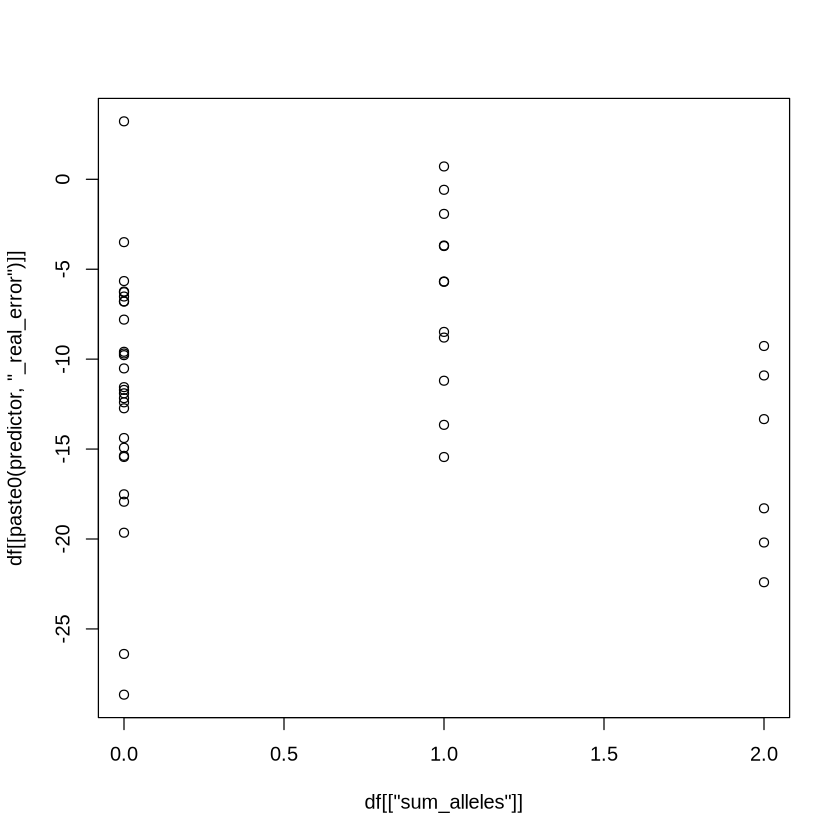

[1] 9.352823e-06


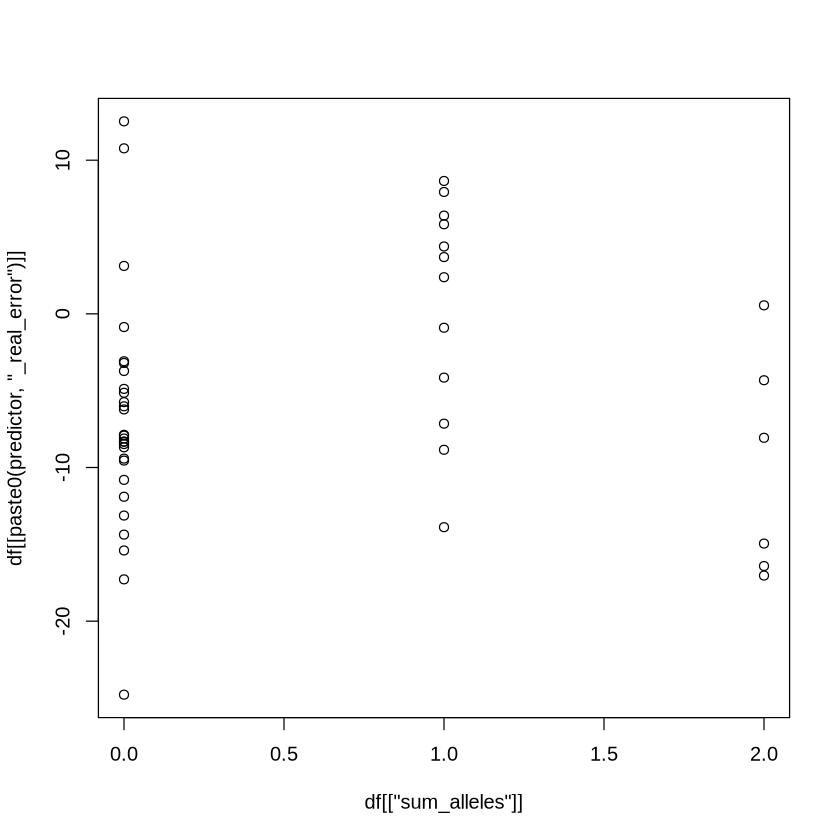

[1] 0.0002416339


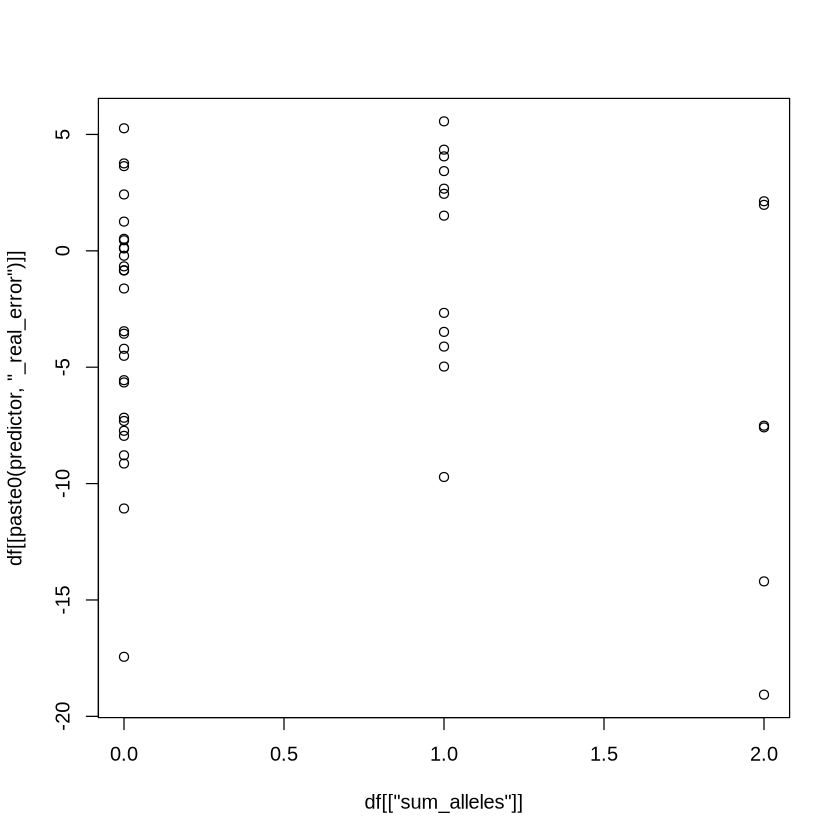

[1] 0.02857711


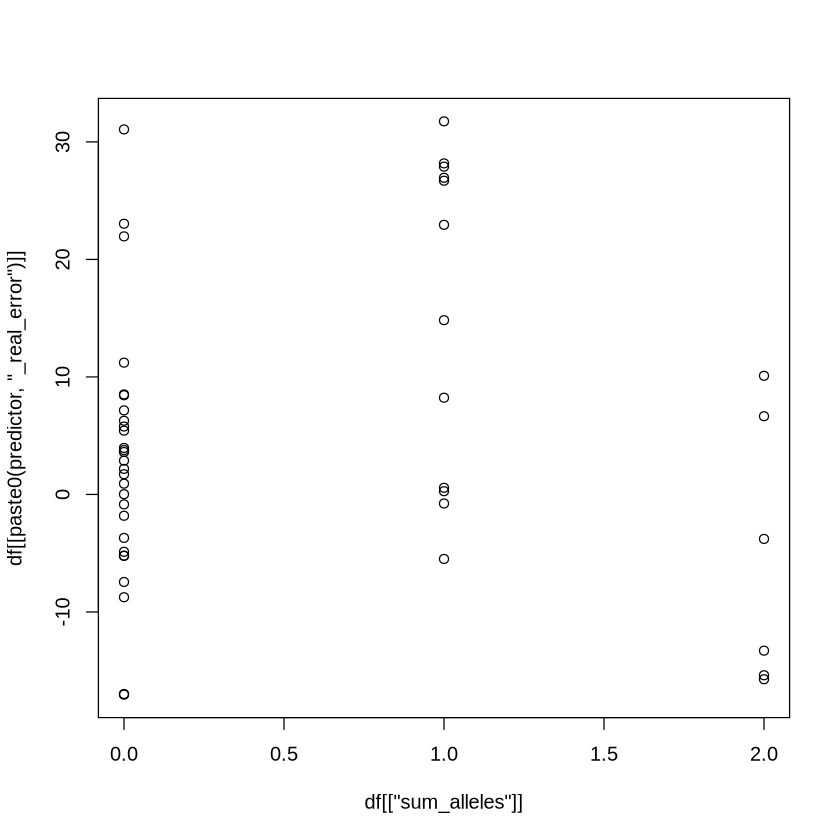

[1] 0.8010152


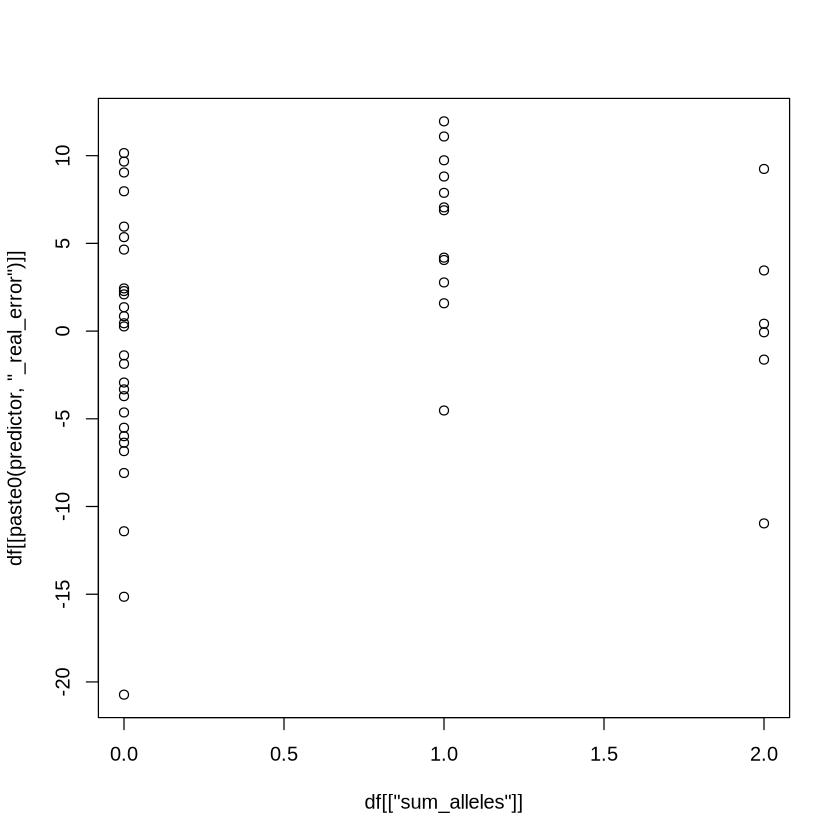

[1] 4.592909e-19


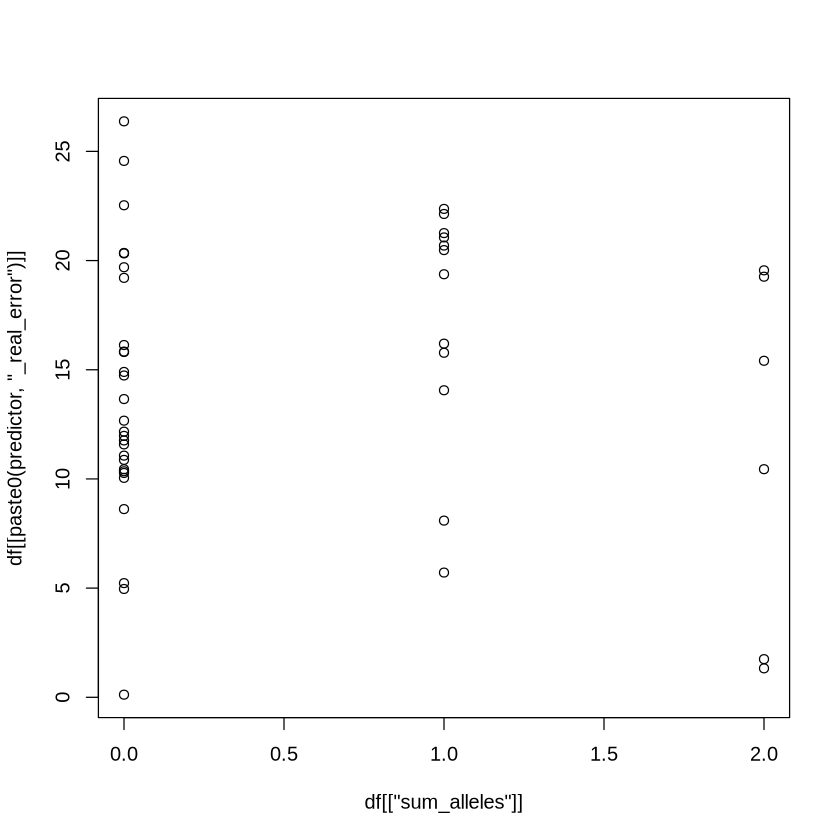

[1] 2.793632e-12


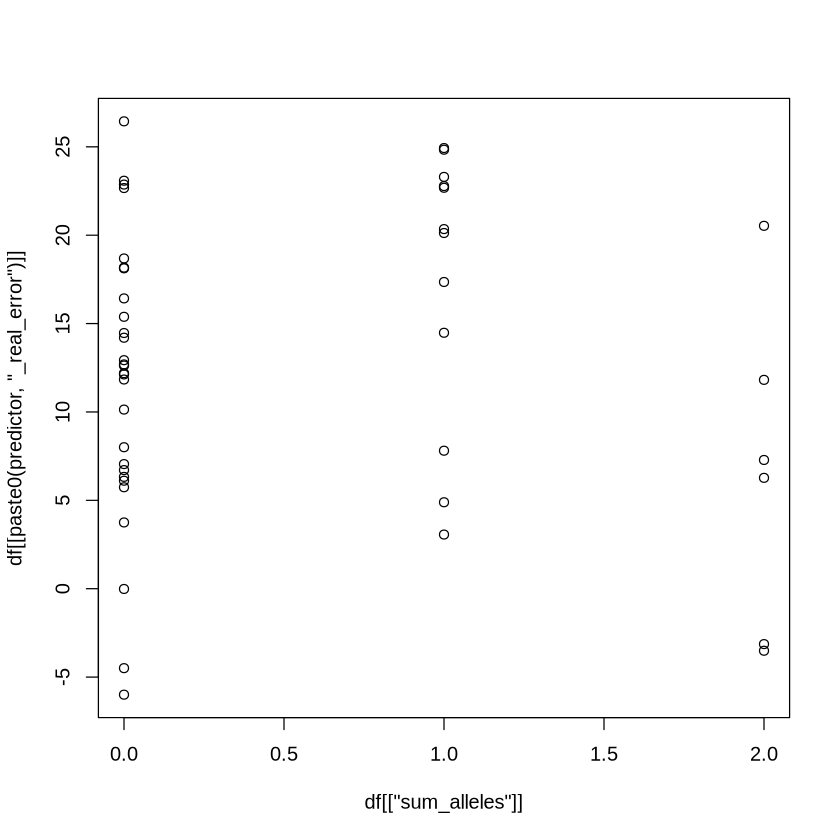

[1] 5.138422e-24


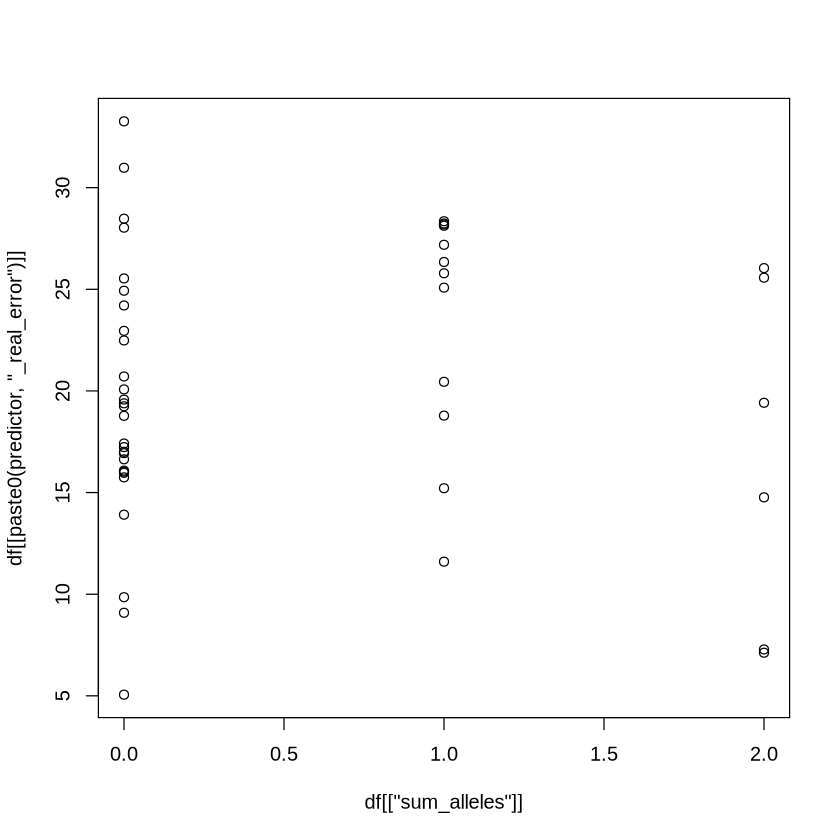

[1] 8.33872e-18


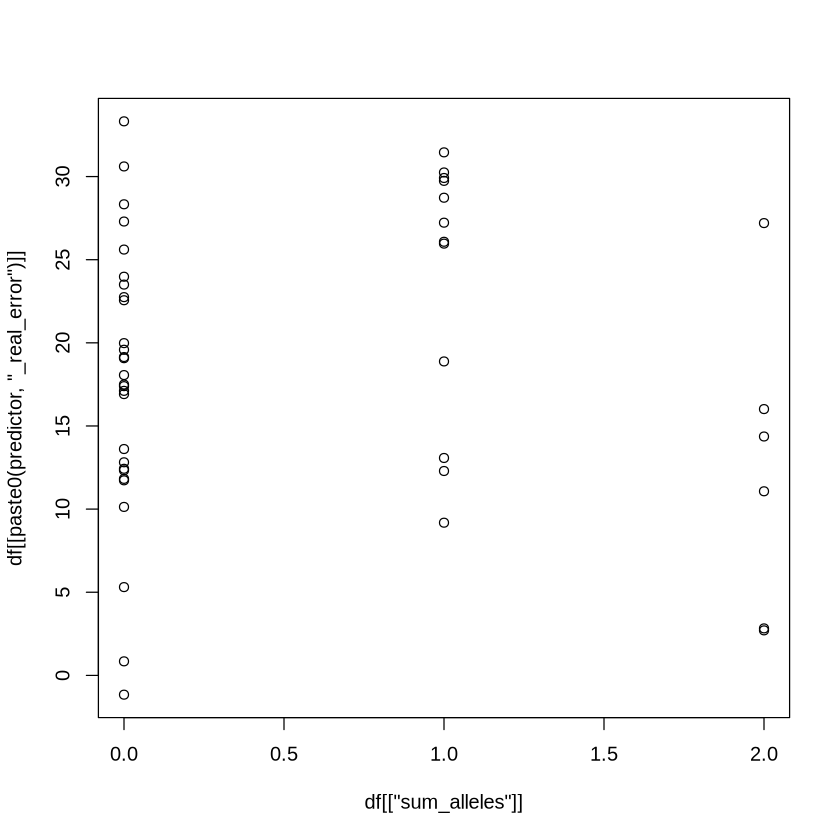

[1] 8.70214e-22


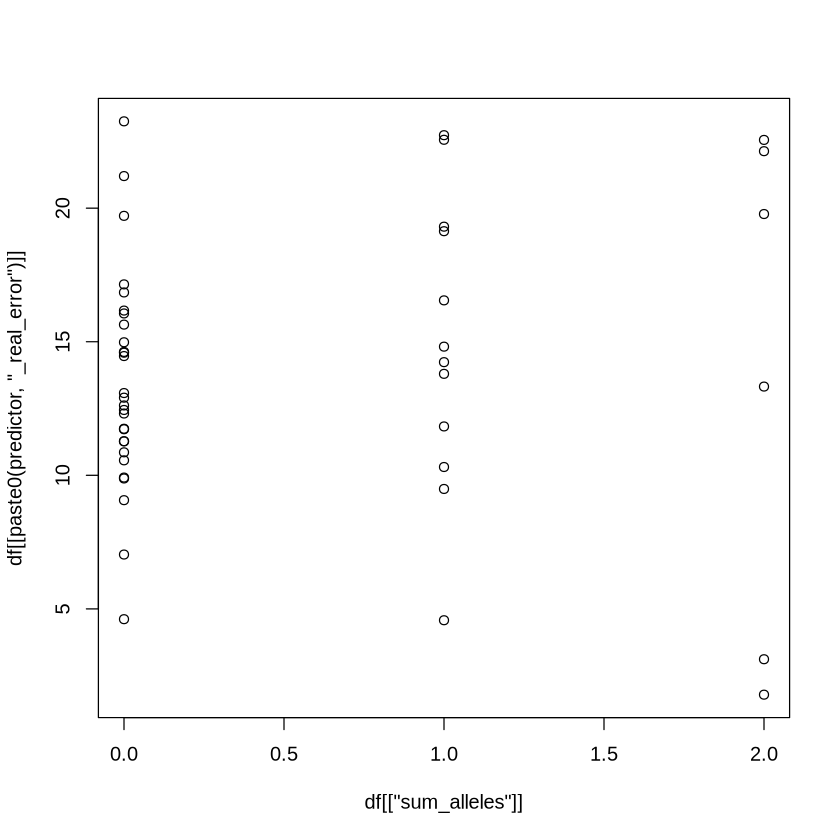

[1] 3.739559e-06


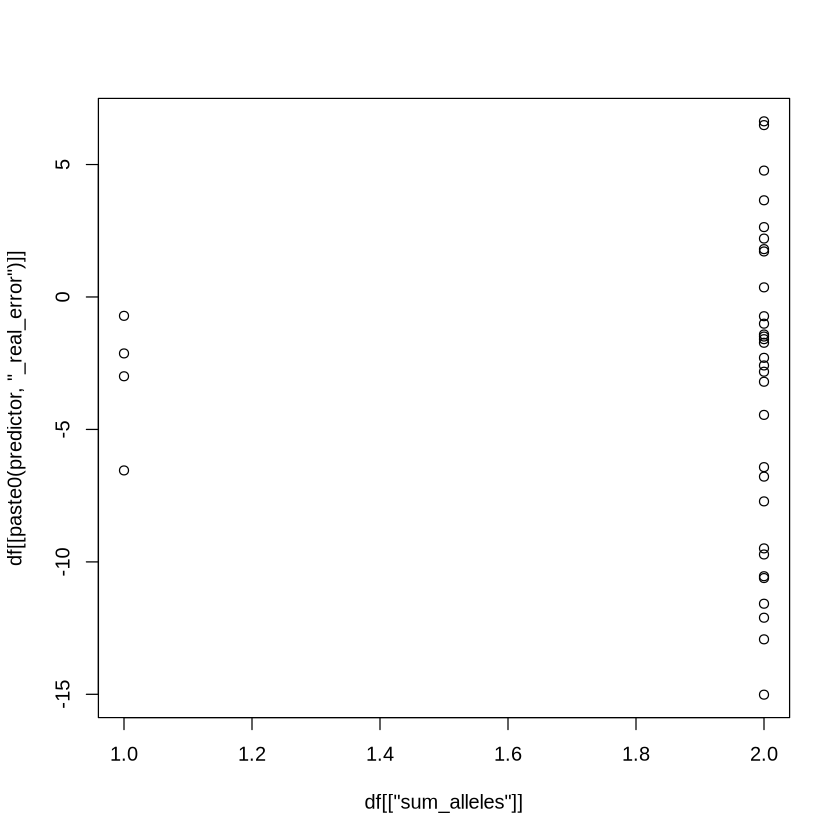

[1] 0.007287529


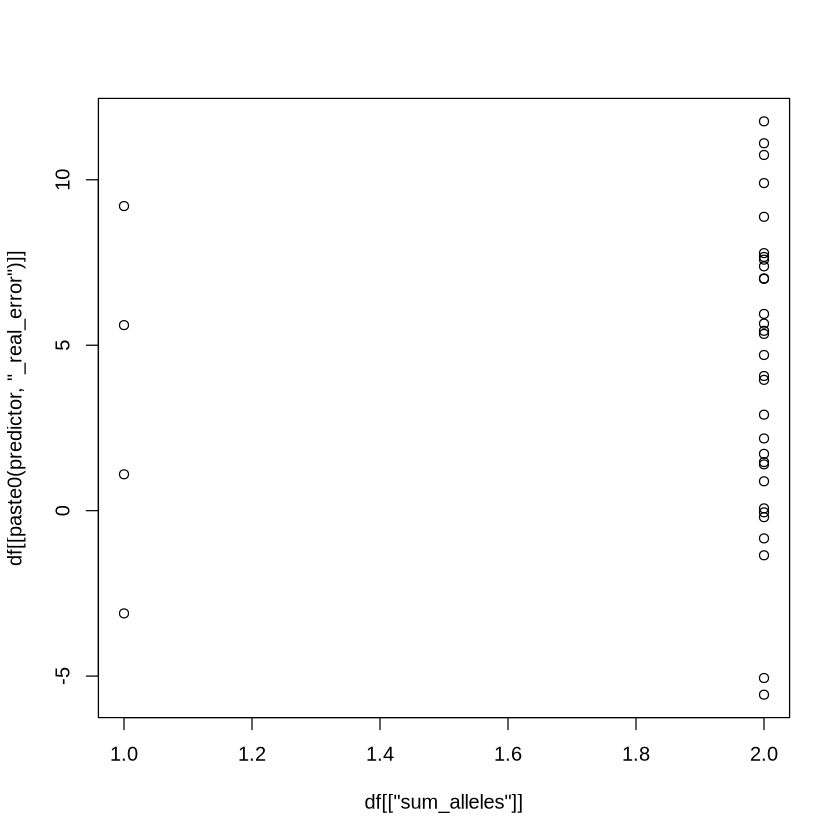

[1] 0.6149971


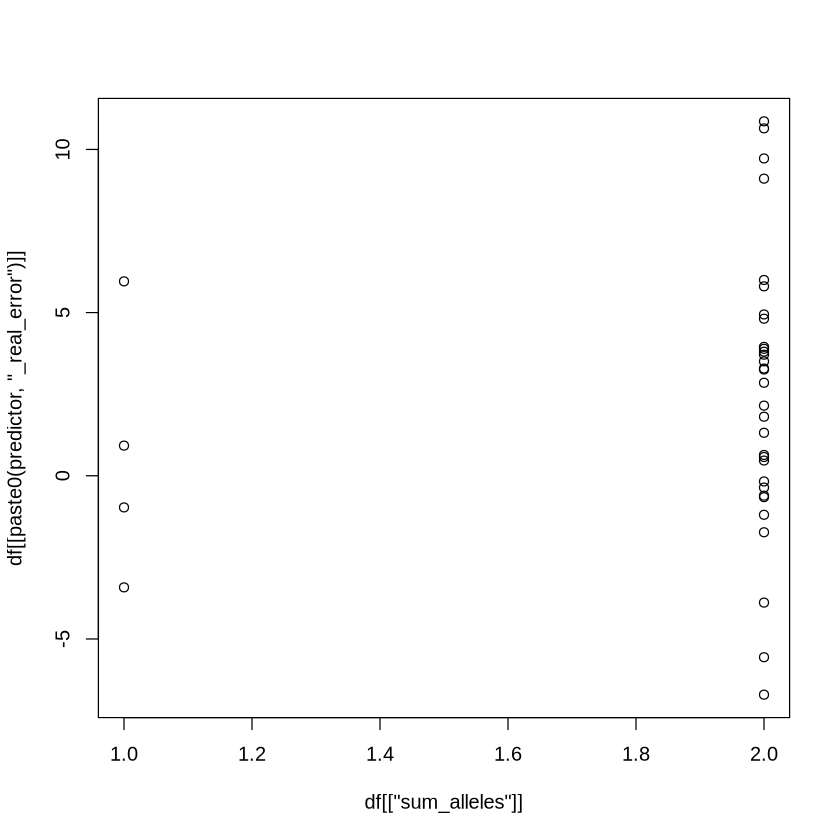

[1] 3.245448e-16


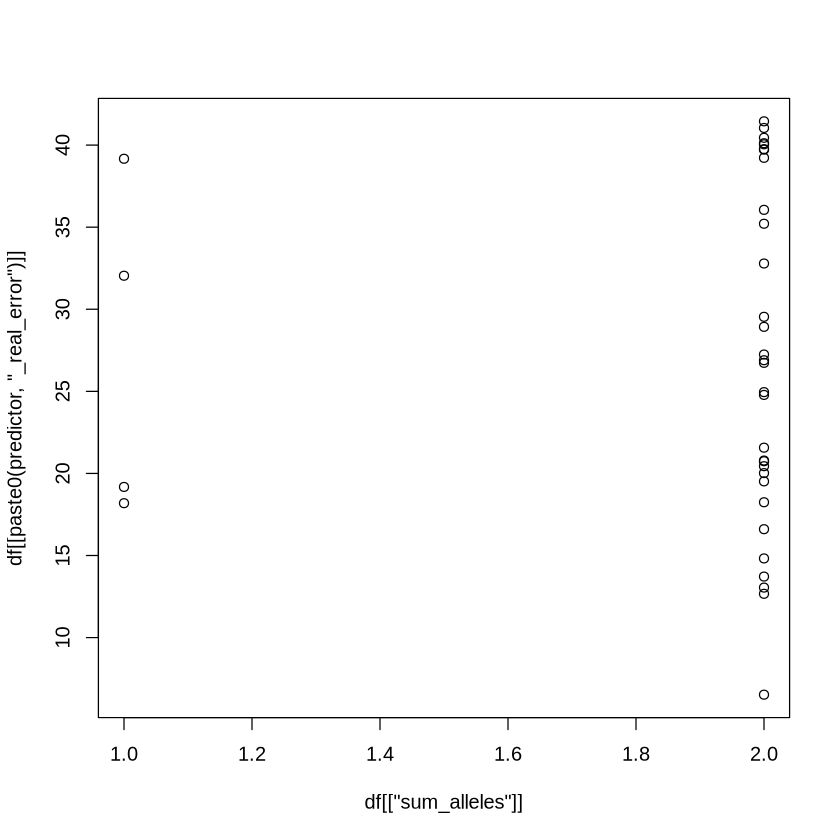

[1] 0.0001781113


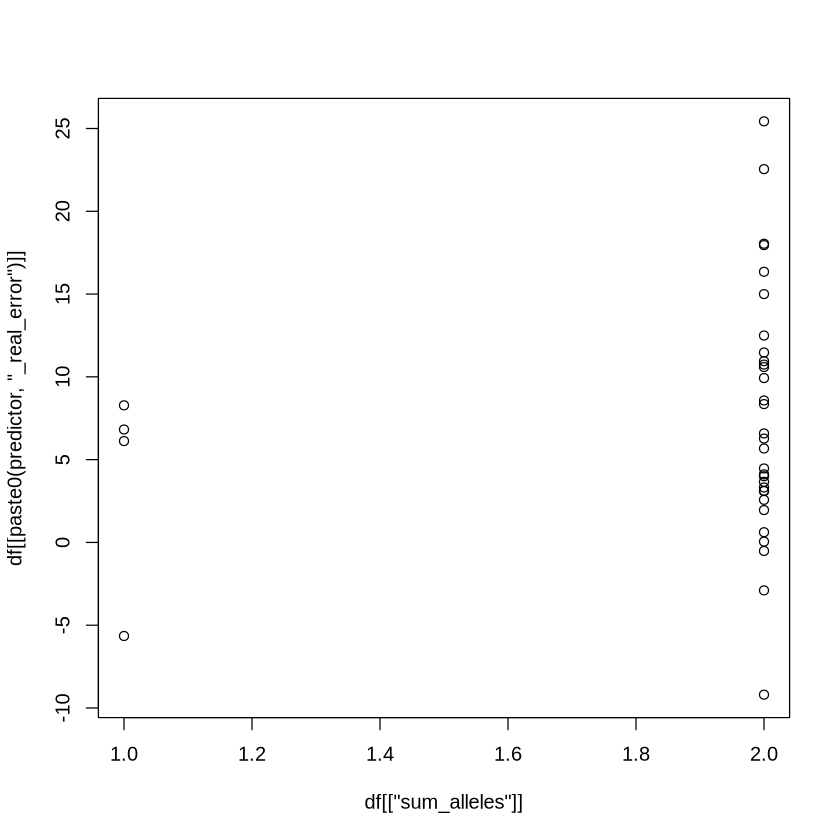

[1] 8.38075e-25


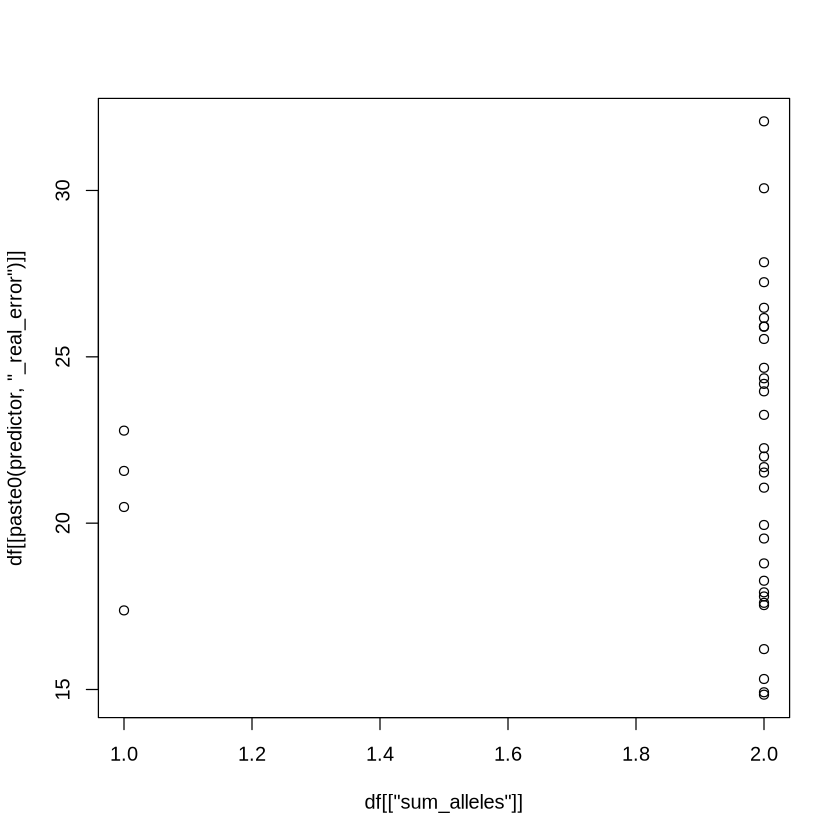

[1] 2.696368e-24


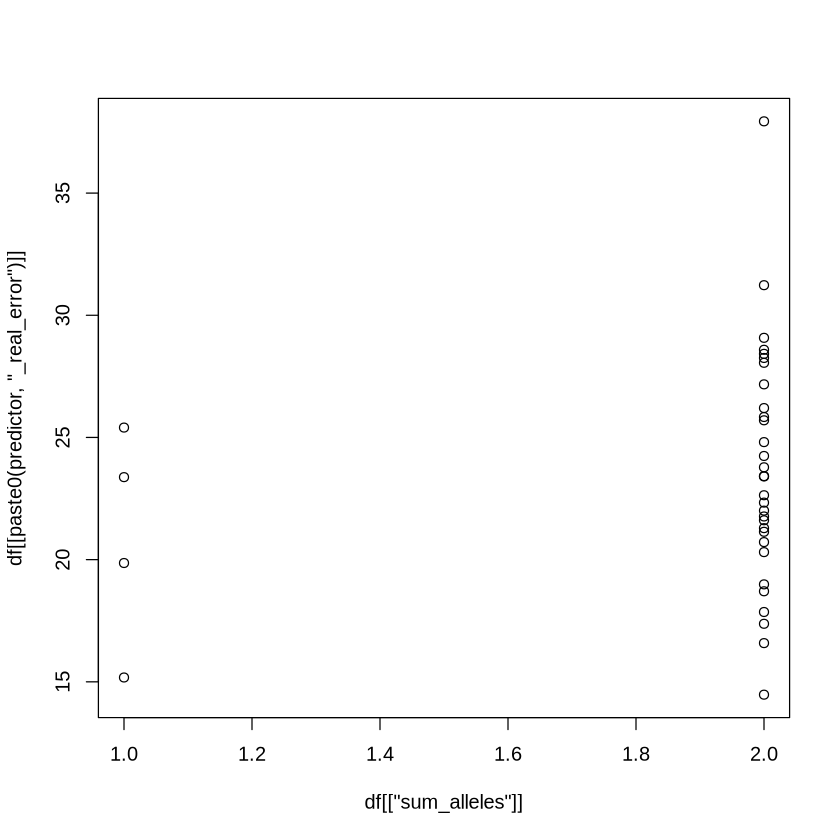

[1] 1.577736e-26


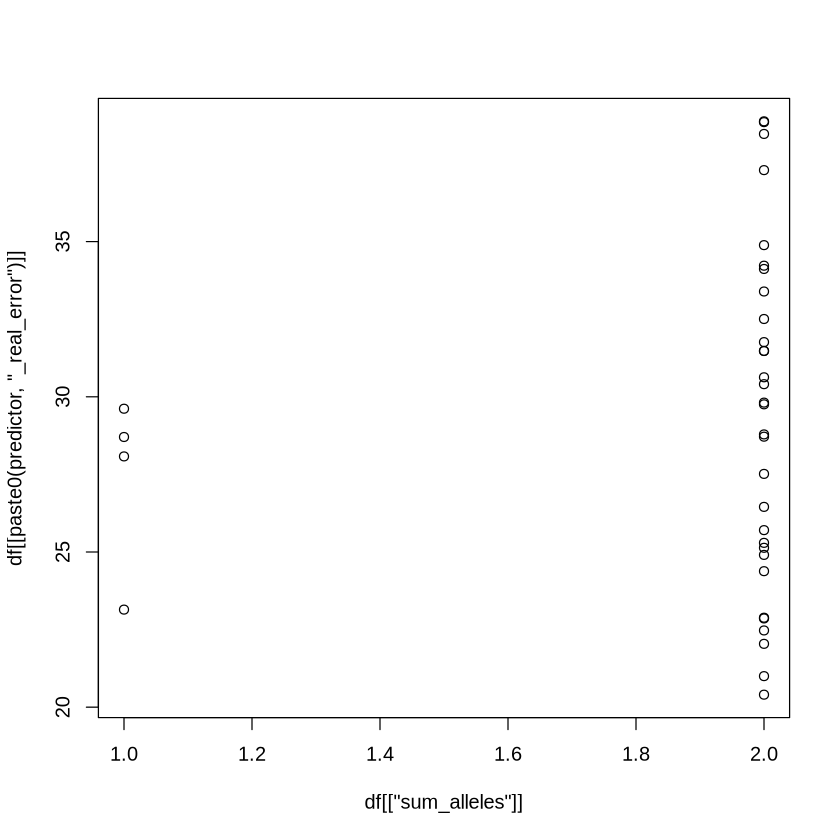

[1] 1.609712e-26


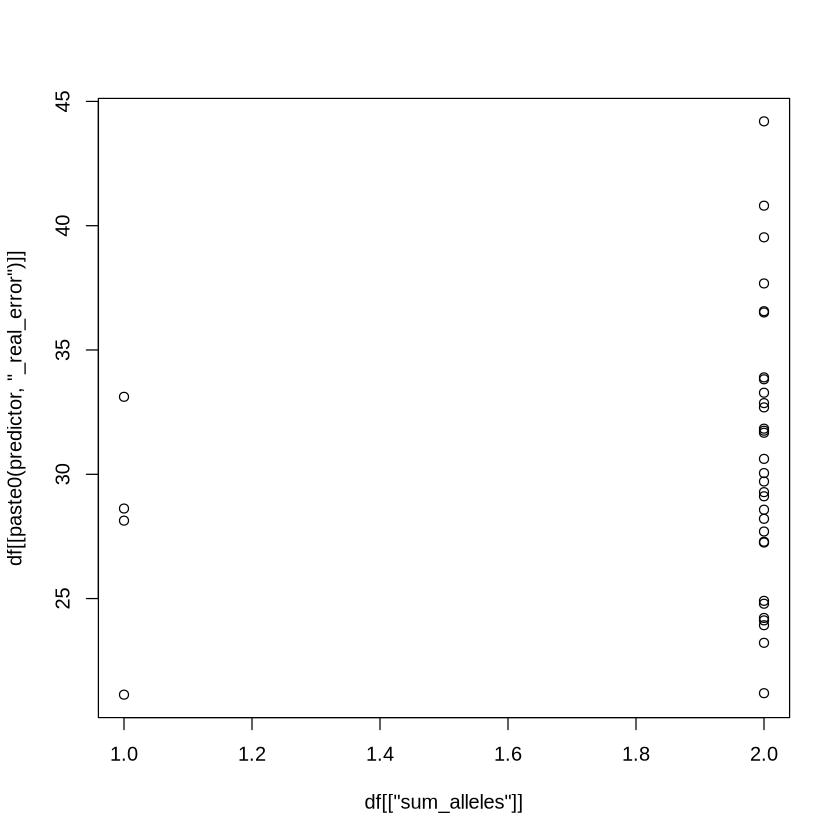

[1] 6.568319e-23
       Population            Predictor  Correlation Correlation_p_value
cor   Khomani San              Horvath -0.025176559           0.8680919
cor1  Khomani San               Hannum  0.059322769           0.6953397
cor2  Khomani San Skin and Blood Clock -0.098807812           0.5135590
cor3  Khomani San                Zhang  0.002160345           0.9886314
cor4  Khomani San             PhenoAge  0.226272352           0.1305065
cor5  Khomani San              GrimAge -0.011117607           0.9415432
cor6  Khomani San     GrimAgepredicted -0.051682421           0.7330218
cor7  Khomani San             GrimAge2 -0.004647722           0.9755447
cor8  Khomani San    GrimAge2predicted -0.042051645           0.7814102
cor9  Khomani San               FitAge  0.069692809           0.6453500
cor10        Baka              Horvath -0.018394982           0.9164689
cor11        Baka               Hannum  0.069833955           0.6901686
cor12        Baka Skin and Blood Clock  0.14037

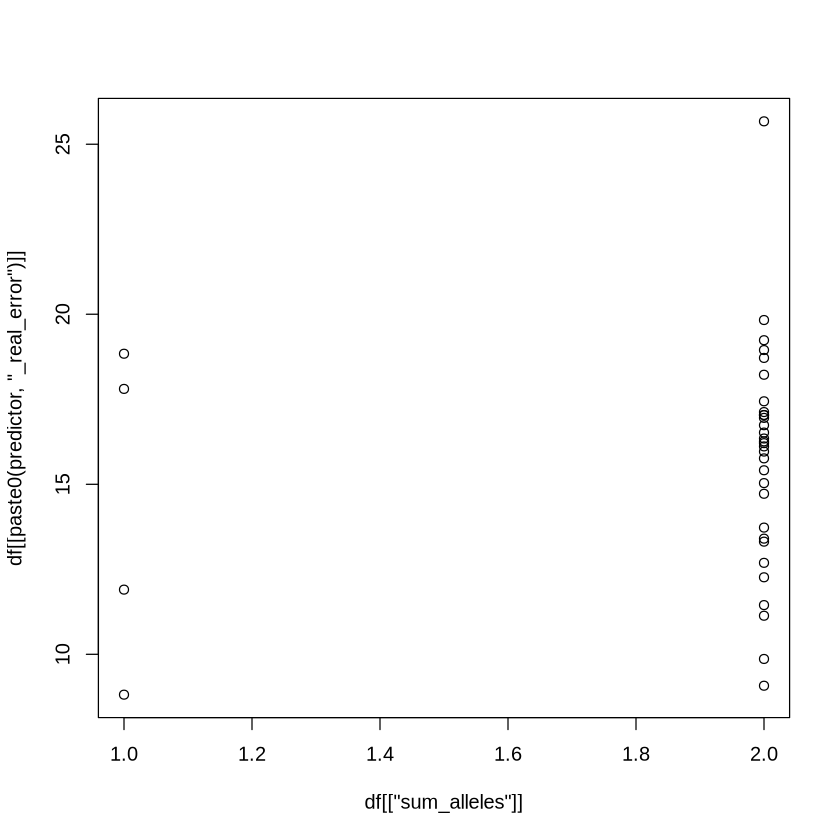

In [4]:
Predictions <- c("Horvath", "Hannum", "Skin and Blood Clock", "Zhang", "PhenoAge", "GrimAge", "GrimAgepredicted", "GrimAge2", "GrimAge2predicted", "FitAge")

library(dplyr)
# Initialize an empty data frame to store results
results_table <- data.frame(
  Population = character(),
  Predictor = character(),
  Correlation = numeric(),
  Correlation_p_value = numeric(),
  stringsAsFactors = FALSE
)
# Ensure your Pop column is a factor and ordered correctly

DAT$Pop <- factor(DAT$Pop, levels = c("Khomani San", "Baka"))

for (pop in c("Khomani San", "Baka")){
    df <- DAT[DAT$Pop == pop, ]

# Convert prediction columns to numeric (if not already done)
for (col in Predictions) {
  df[[col]] <- as.numeric(df[[col]])
}

# Analyzing Residuals for each metric
  for(predictor in Predictions){
    df[[paste0(predictor, "_real_error")]] <- df[[predictor]] - df[["Age"]]
    df[[paste0(predictor, "_abs_error")]] <- abs(df[[predictor]] - df[["Age"]])
    
    # Perform the correlation test
    cor_test <- cor.test(df[["sum_alleles"]], df[[paste0(predictor, "_real_error")]])
    t_test <- t.test( df[["sum_alleles"]], df[[paste0(predictor, "_real_error")]])
    plot(df[["sum_alleles"]], df[[paste0(predictor, "_real_error")]])
    print(t_test$p.value)
   
    # Extract the required values and store in the results table
    results_table <- rbind(results_table, data.frame(
      Population = pop,
      Predictor = predictor,
      Correlation = cor_test$estimate,
      Correlation_p_value = cor_test$p.value

    ))
    
 }}


# Print or save the combined plot

print(results_table)
write.csv(results_table, file="DARC_prediction_error_corr.csv")

In [18]:
library(ggplot2)
library(cowplot)

# Initialize a list to store the plots
plot_list <- list()

#for (pop in c("Khomani San", "Baka")) {
    pop <- "Khomani San"
    #pop <- "Baka"
    df <- DAT[DAT$Pop == pop, ]
    nrow(df)
    options(repr.plot.width = 15, repr.plot.height = 40)
    if(pop == "Khomani San"){pop <- "\u2021Khomani San_"}
    if(pop == "Baka") {pop <- "Baka_"}
    for (predictor in Predictions) {
        # Calculate the absolute error
        df[[paste0(predictor, "_real_error")]] <- df[[predictor]] - df[["Age"]]        
        # Calculate the correlation and p-value
        cor_test <- cor.test(df$sum_alleles, df[[paste0(predictor, "_real_error")]])
        cor_value <- round(cor_test$estimate, 2)
        p_value <- signif(cor_test$p.value, 2)
        
        # Calculate the y position as max(y) - 10
        y_position <- max(df[[paste0(predictor, "_real_error")]], na.rm = TRUE) - .5*(max(df[[paste0(predictor, "_real_error")]], na.rm = TRUE))
        
        # Create a ggplot for each predictor
        p <- ggplot(df, aes(x = sum_alleles, y = !!sym(paste0(predictor, "_real_error")))) +
            geom_point(size = 5, color = "blue") +
            geom_smooth(method = "lm", color = "red", se = FALSE) +  # Add linear regression line
            labs(title = paste0(pop, predictor, " Error"), x = "Sum Alleles", y = "Raw Error") +
                annotate("text", x = Inf, y = Inf, 
             label = paste0("r = ", cor_value, "\n", "p = ", p_value), 
             hjust = 1.5, vjust = 2, size = 10, color = "black") +  # Adjust hjust and vjust for proper alignment
            scale_x_continuous(breaks = c(0, 1, 2)) +
            theme_bw() + 
            theme_bw(base_size = 50) + 
            theme(
                legend.position = "none",
                axis.text = element_text(size = 30),
                axis.title = element_text(size = 30, margin = margin(r = 10)),
                plot.title = element_text(size = 30), 
                plot.margin = margin(t = 20, r = 20, b = 20, l = 20)
            )
        
        # Add the plot to the list
        plot_list[[paste(pop, predictor, sep = "_")]] <- p
    }
#}

# Combine the plots into a grid (adjust ncol based on the number of plots)
#combined_plots_baka <- plot_grid(plotlist = plot_list, ncol = 2, labels=c("A","B","C","D","E","F","G","H","I", "J"), label_size=40)
combined_plots_khs <- plot_grid(plotlist = plot_list, ncol = 2, labels=c("A","B","C","D","E","F","G","H","I", "J"), label_size=40)



[1] 46

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


png 
  2

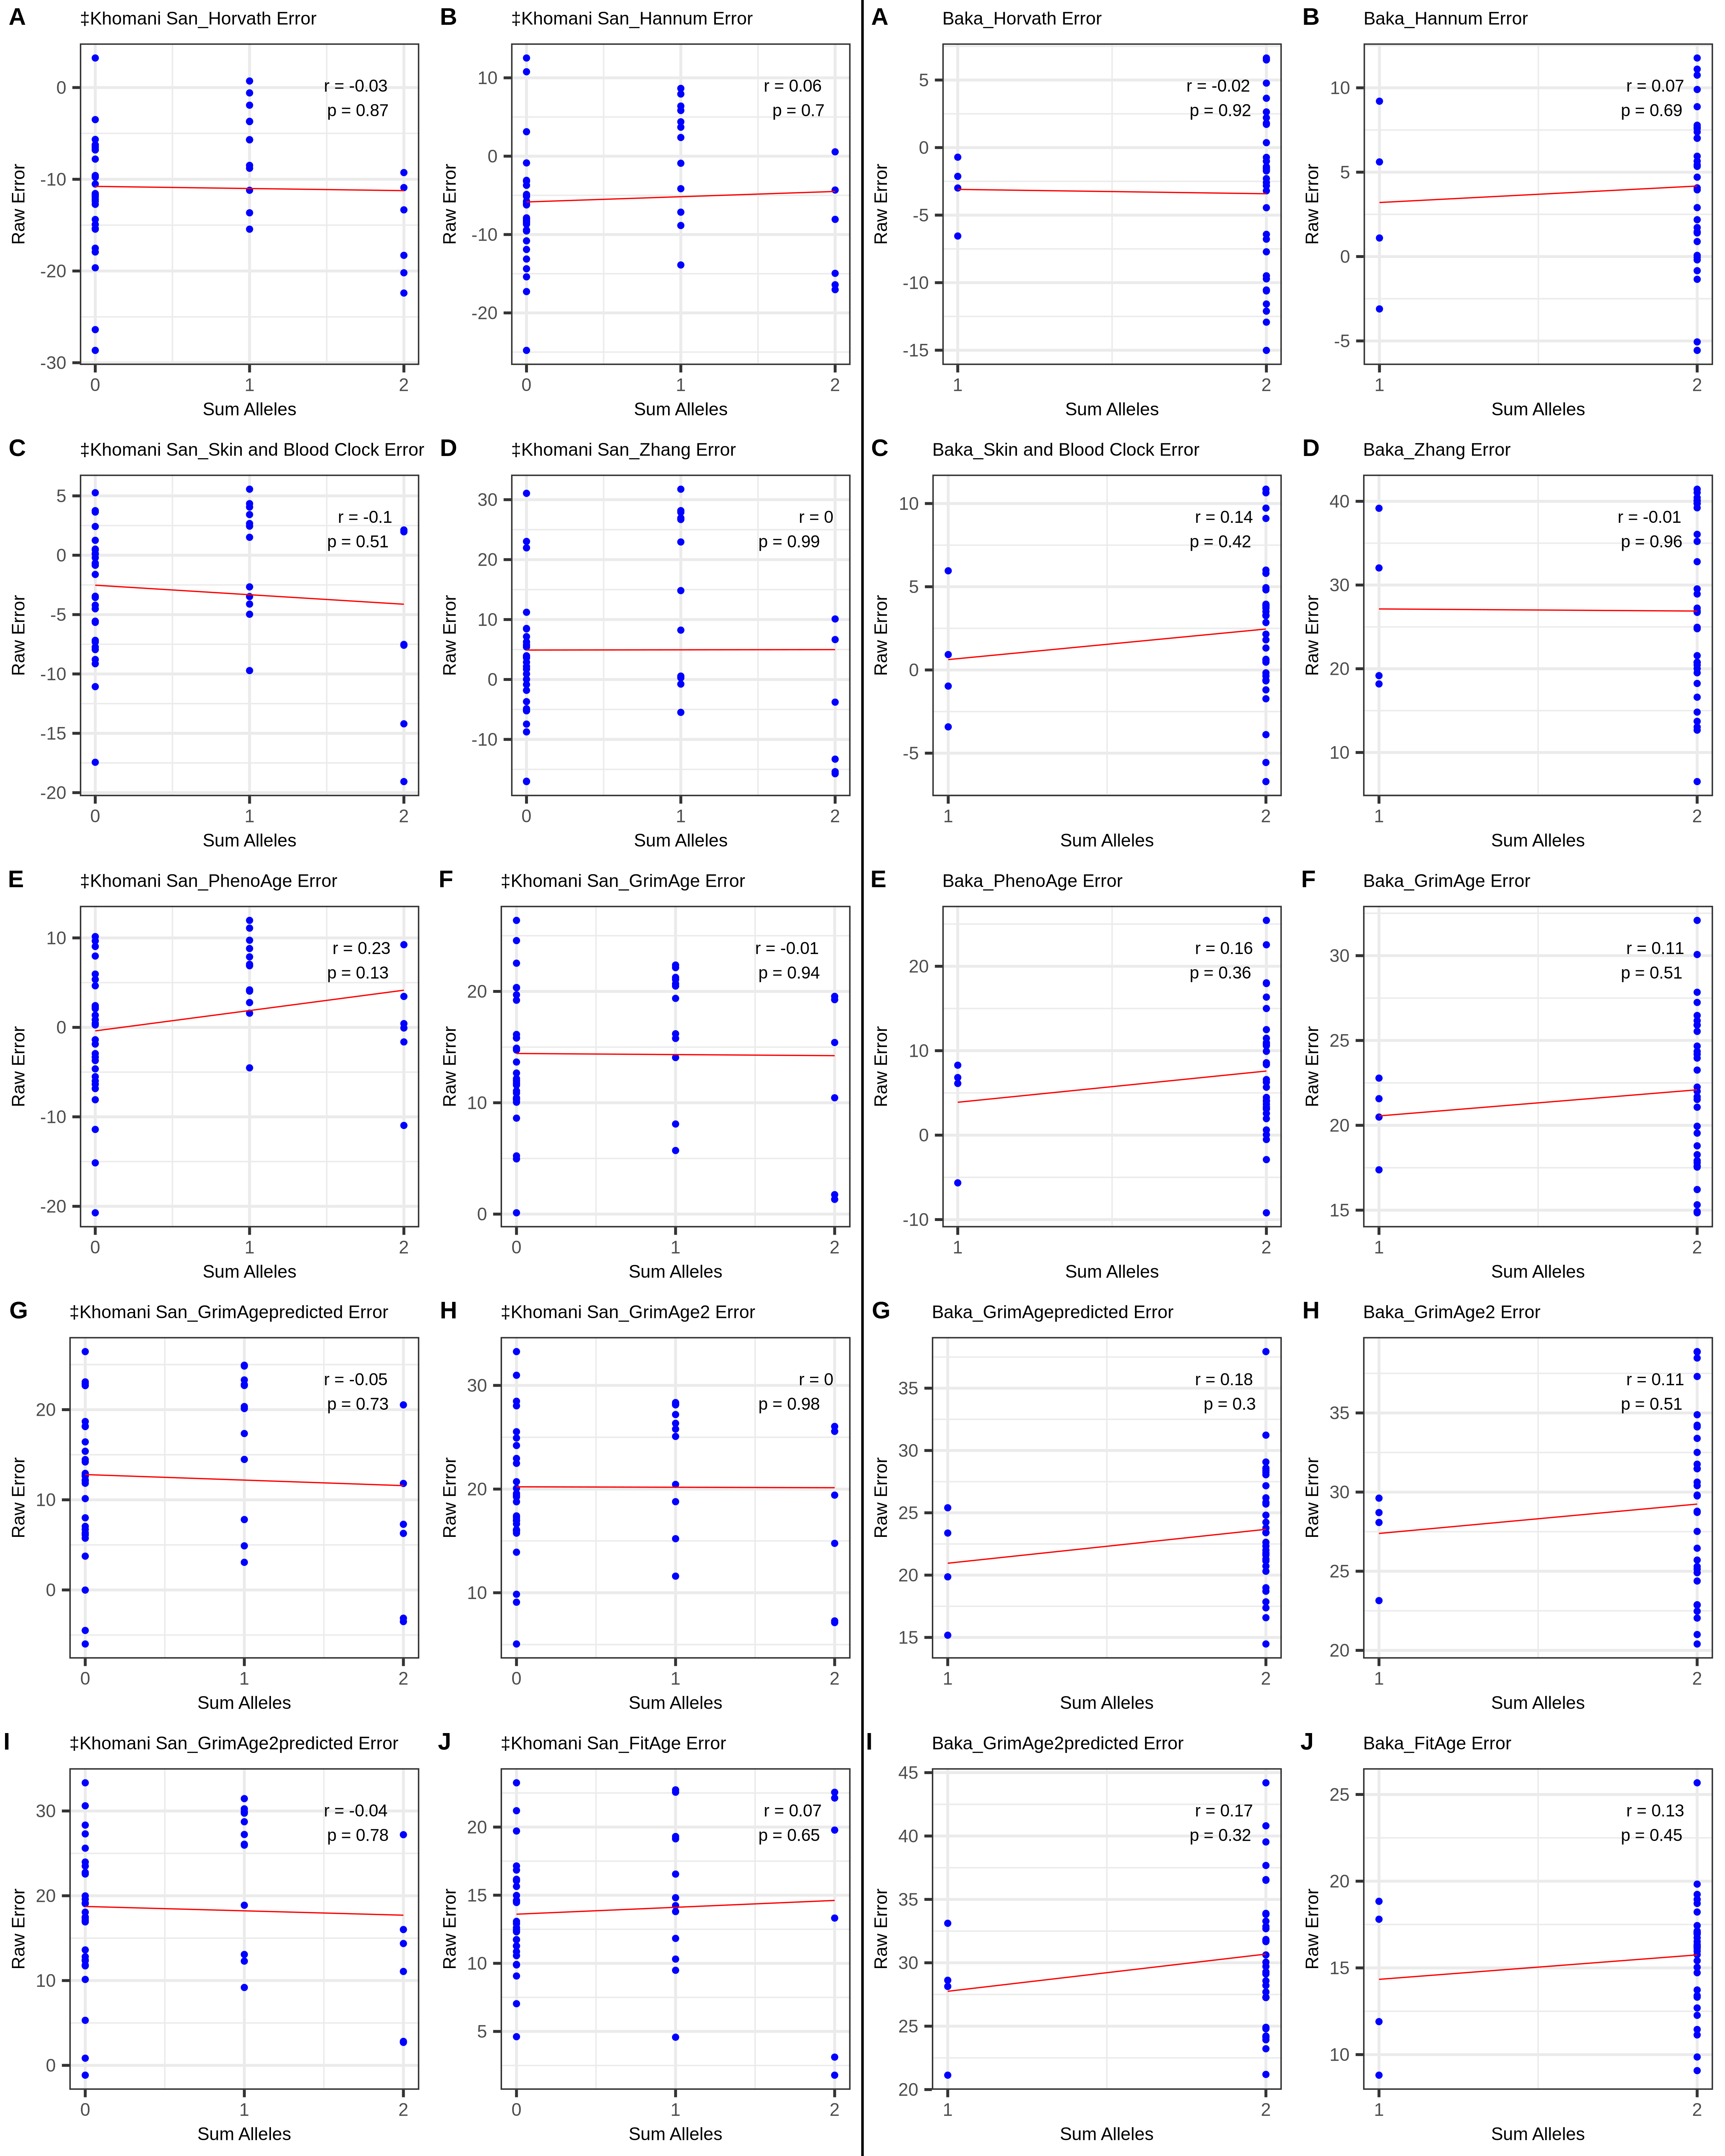

In [20]:
options(repr.plot.width = 40, repr.plot.height = 50)

combined_plots <- plot_grid(combined_plots_khs, combined_plots_baka, ncol = 2)

png("prediction_DARC.png", width = 40*500, height = 50*500, res = 500)  # 300 DPI resolution

# Create the plot
final_plot <- ggdraw(combined_plots) +
  draw_line(x = 0.5, y = c(0, 1), color = "black", size = 2) 

# Print the plot
print(final_plot)

# Close the device
dev.off()

final_plot

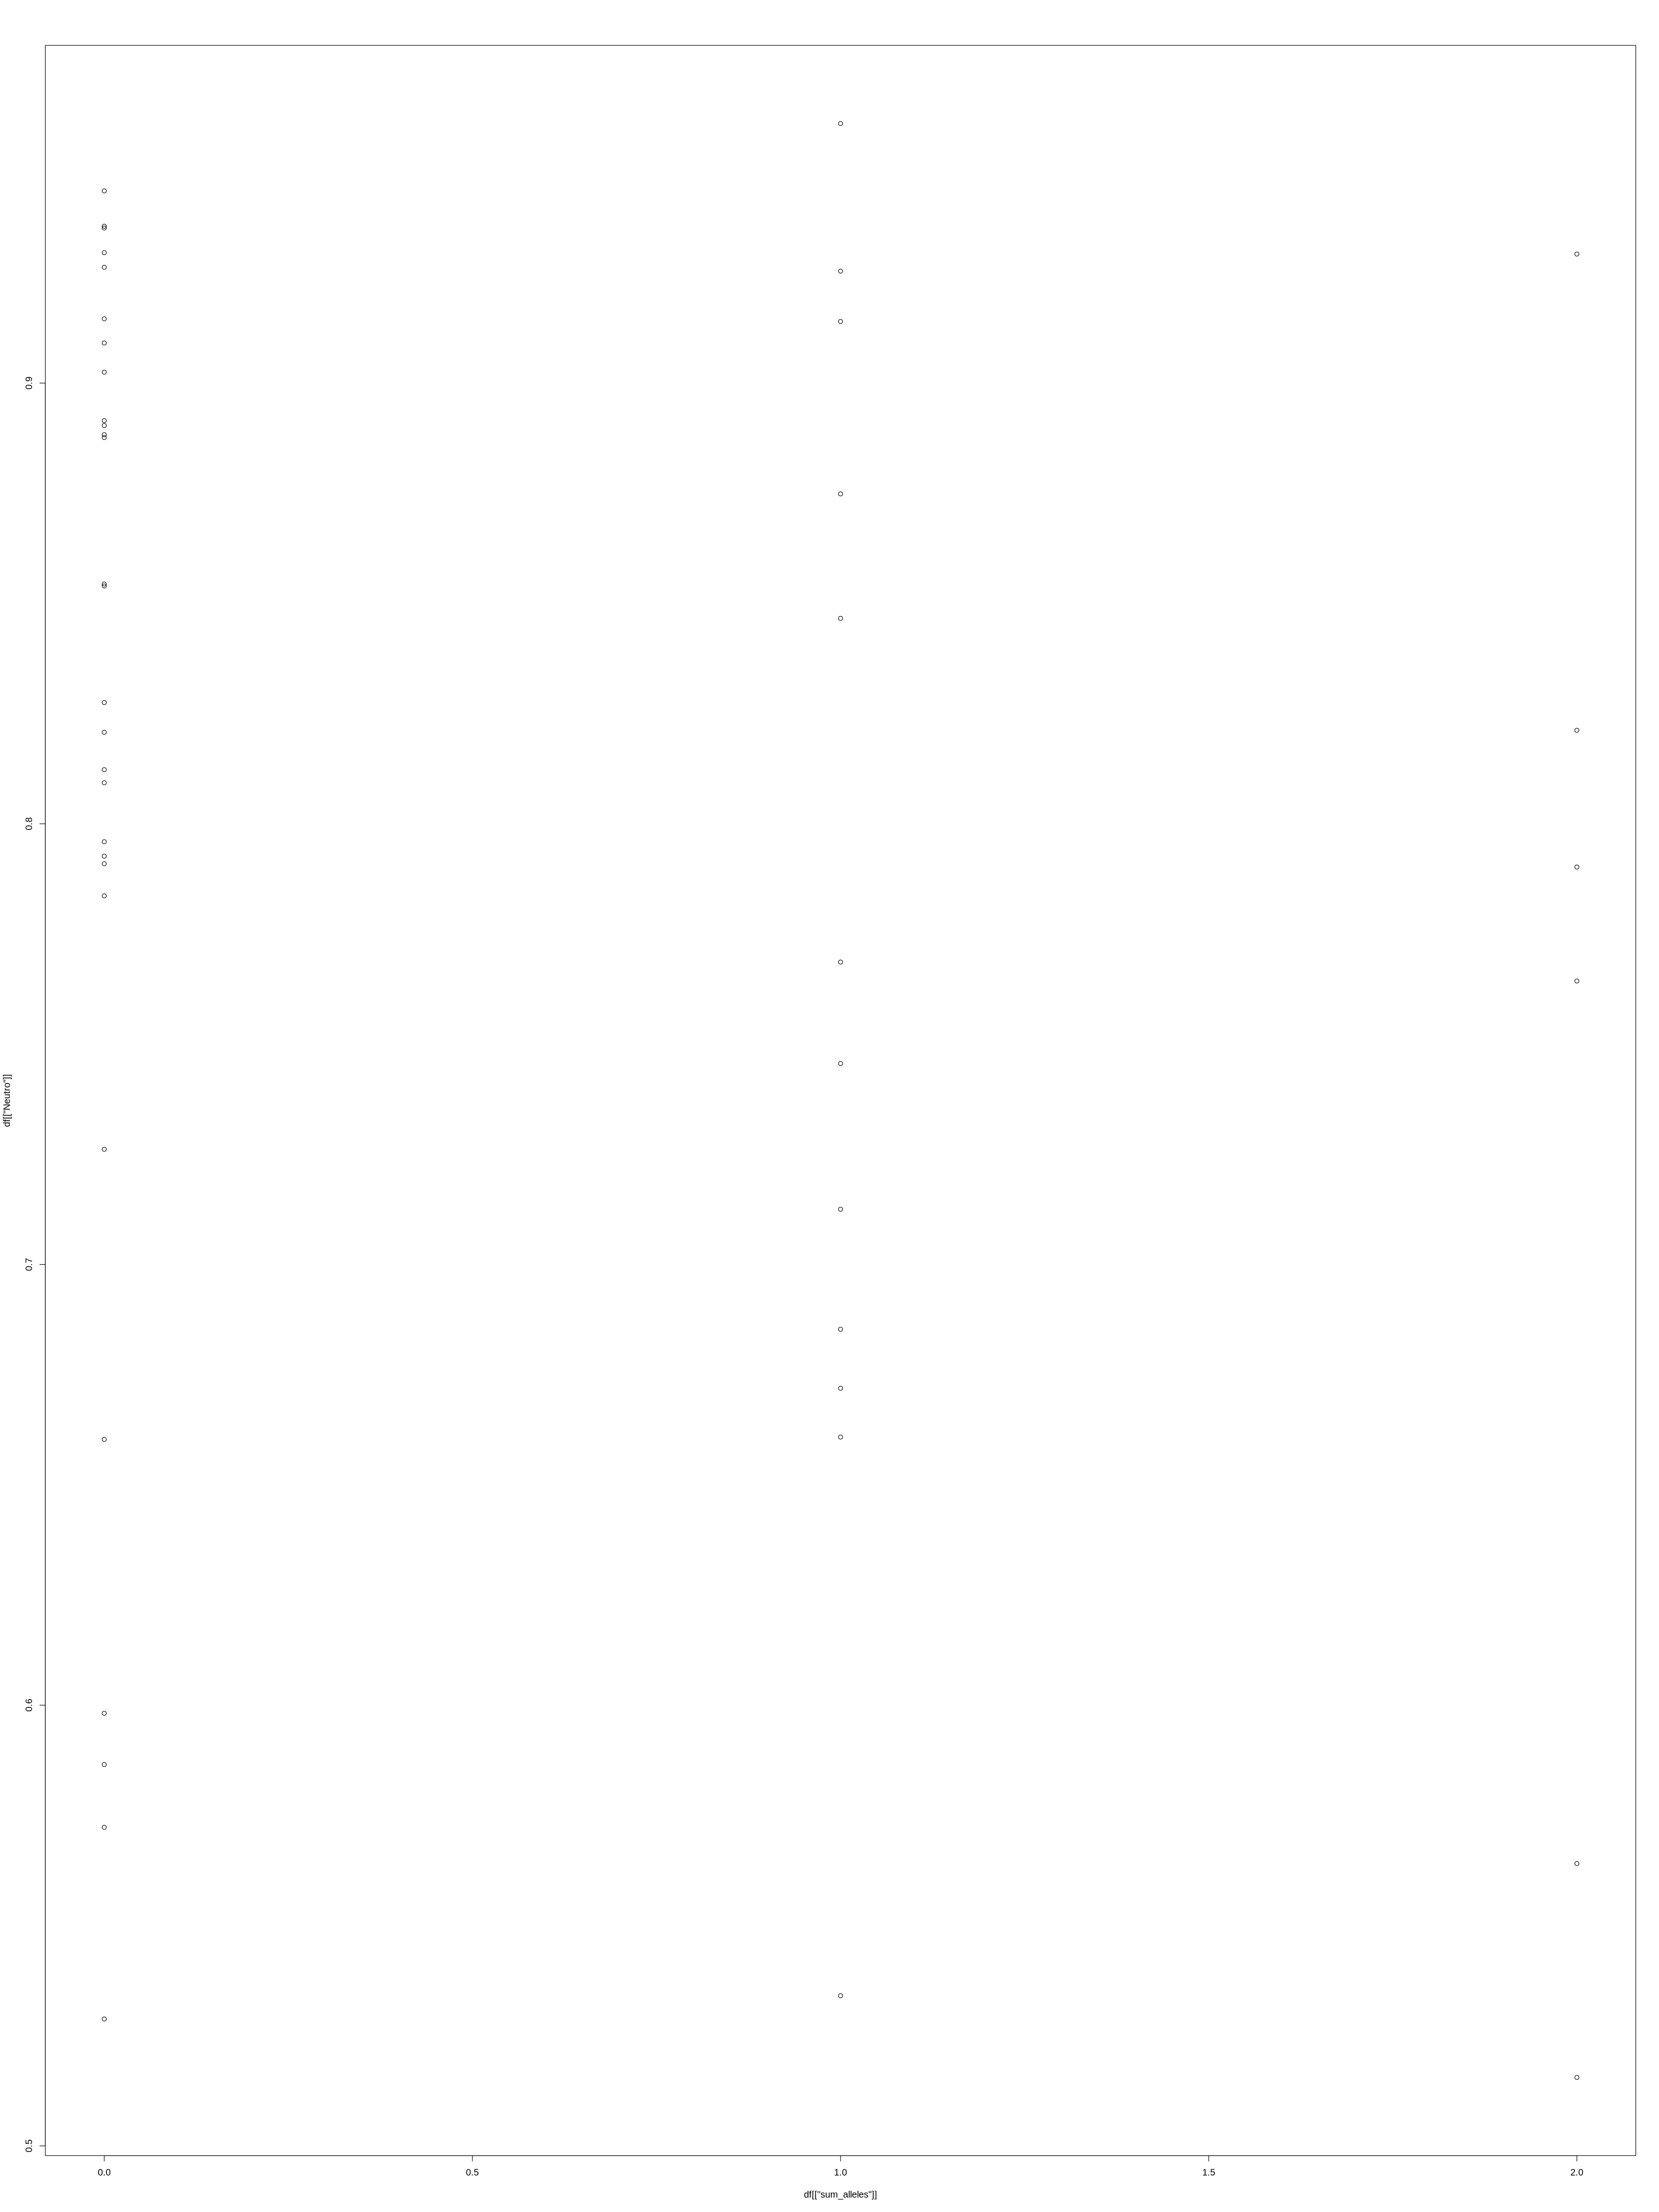

      Population Correlation Correlation_p_value
cor  Khomani San  -0.2268001           0.1295880
cor1        Baka  -0.1335952           0.4442149


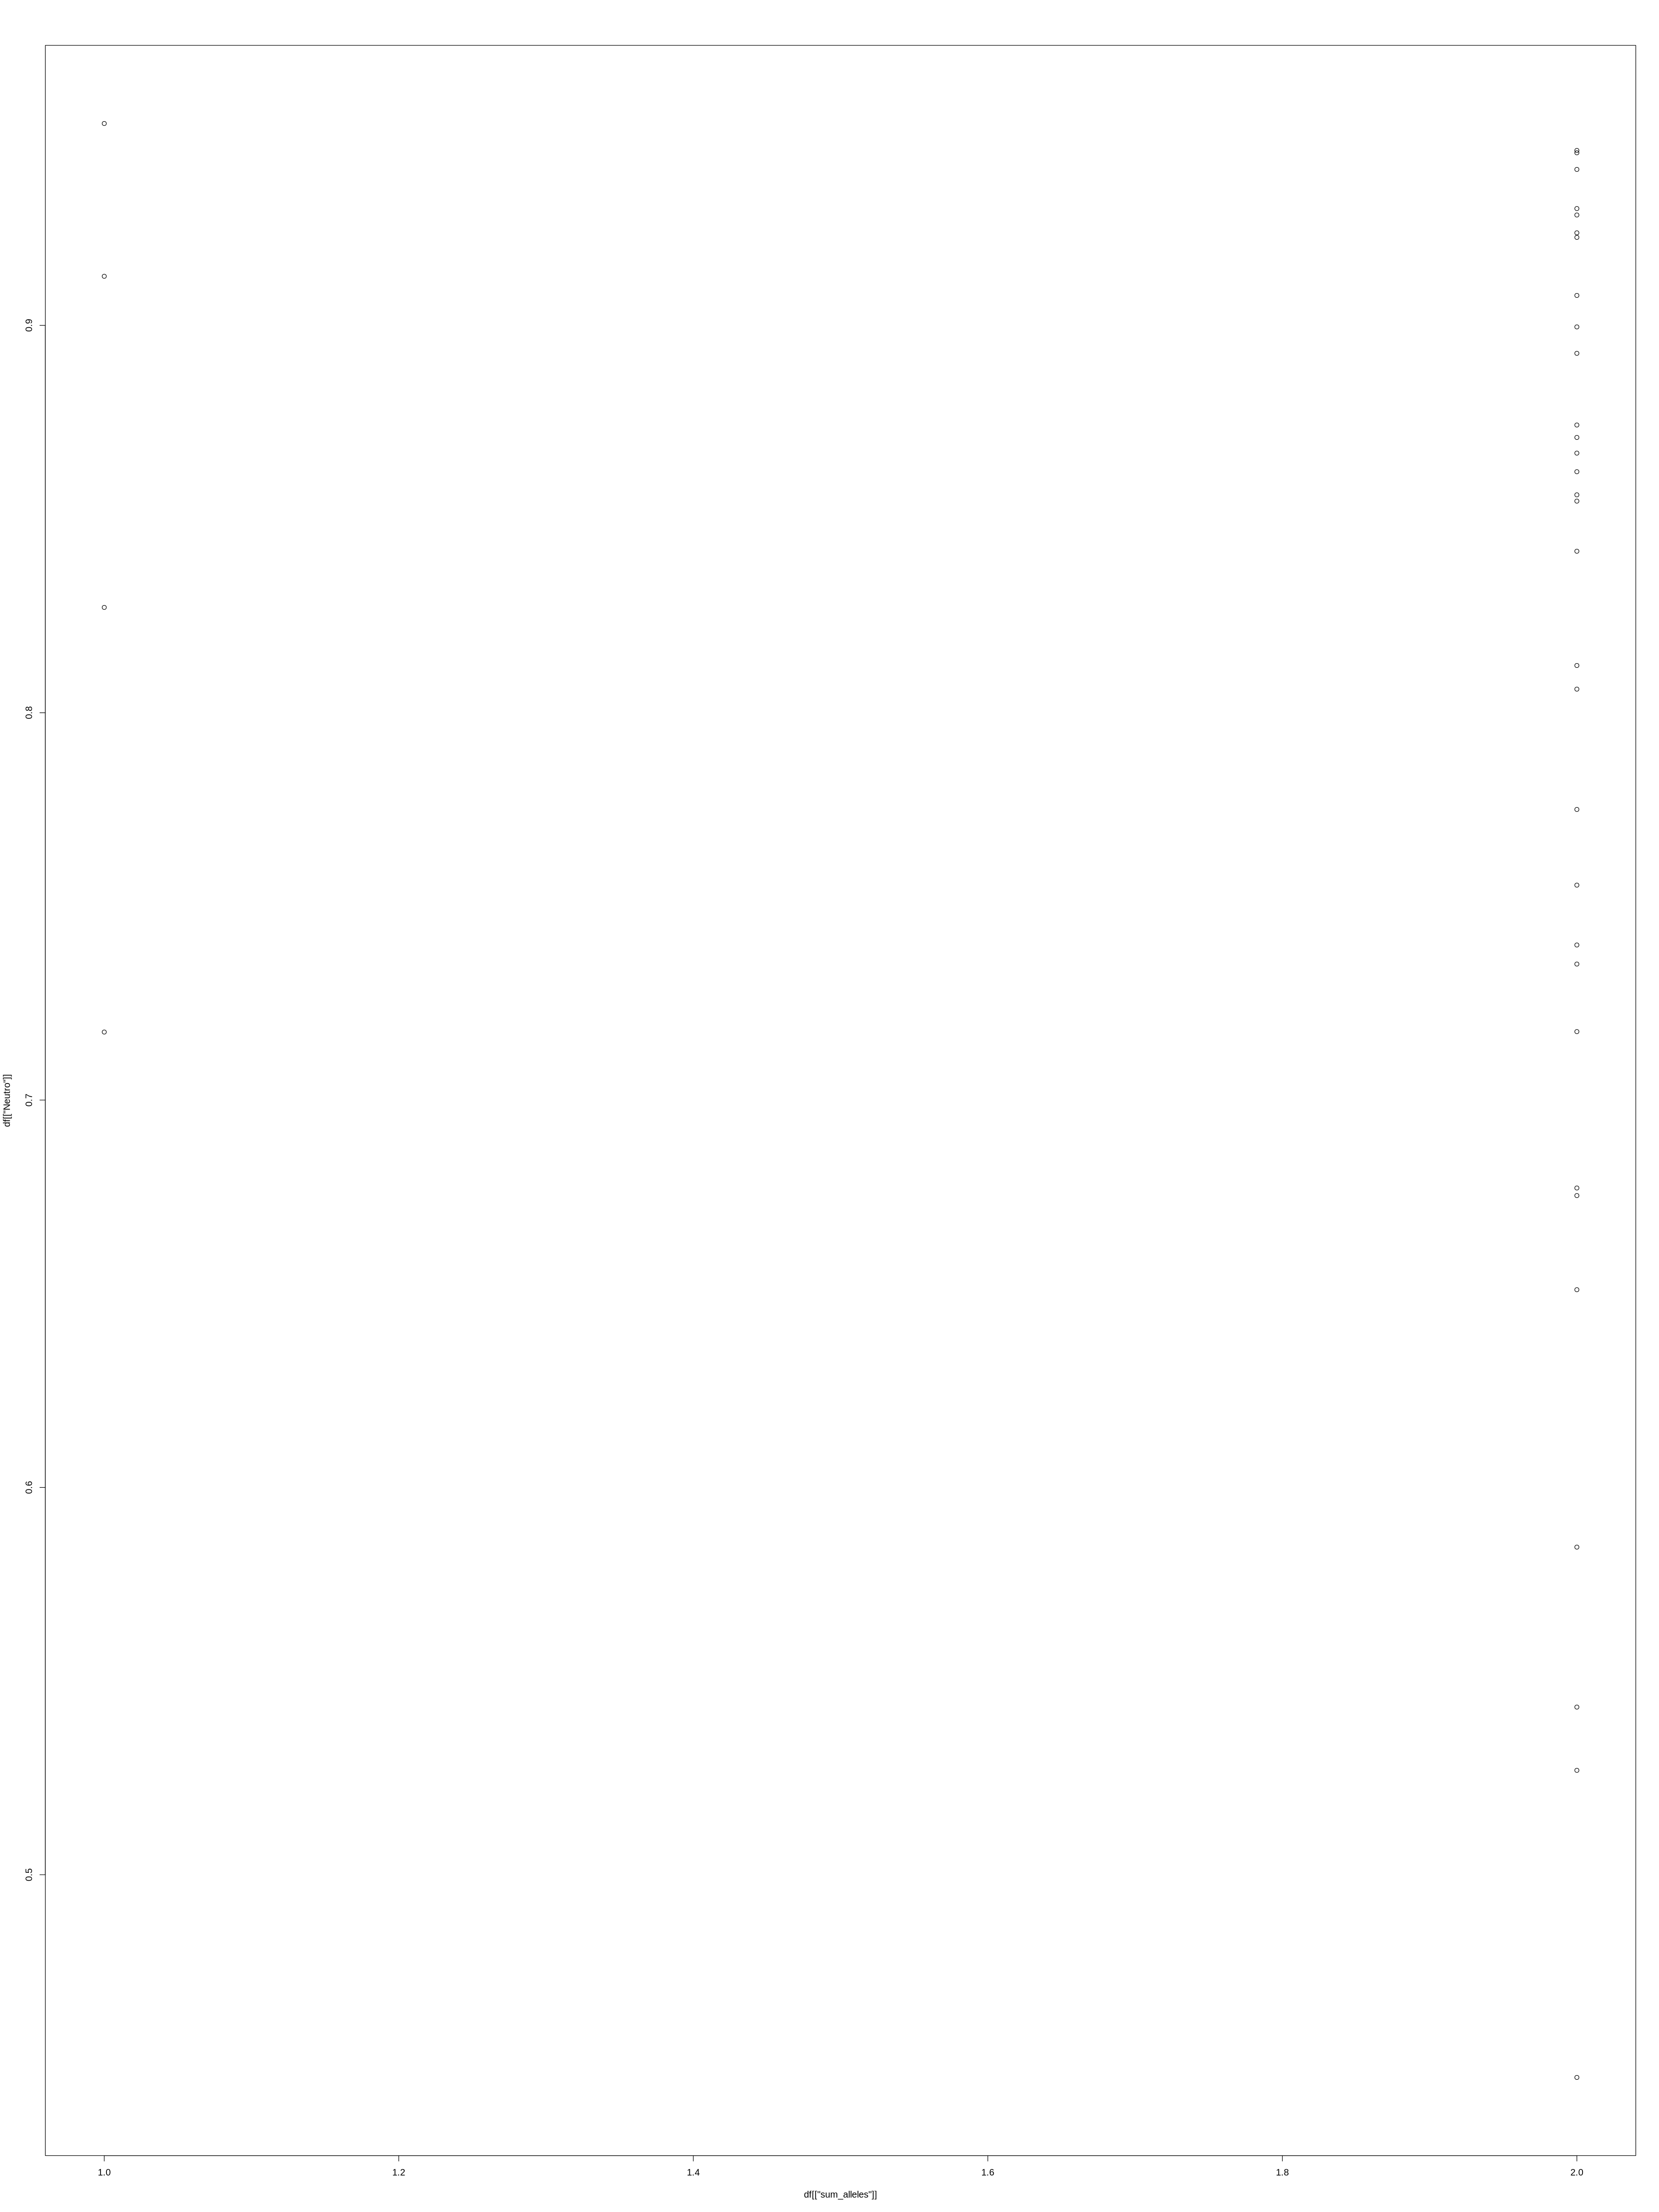

In [13]:
# Initialize an empty data frame to store results
results_table <- data.frame(
  Population = character(),
  Predictor = character(),
  Correlation = numeric(),
  Correlation_p_value = numeric(),
  stringsAsFactors = FALSE
)
# Ensure your Pop column is a factor and ordered correctly

DAT$Pop <- factor(DAT$Pop, levels = c("Khomani San", "Baka"))

for (pop in c("Khomani San", "Baka")){
    df <- DAT[DAT$Pop == pop, ]

    # Perform the correlation test
    cor_test <- cor.test(df[["sum_alleles"]], df[["Neutro"]])
    plot(df[["sum_alleles"]], df[["Neutro"]])

   
    # Extract the required values and store in the results table
    results_table <- rbind(results_table, data.frame(
      Population = pop,
      Correlation = cor_test$estimate,
      Correlation_p_value = cor_test$p.value

    ))
    
 }

print(results_table)
write.csv(results_table, file="DARC_neutro_corr.csv")

[1] 35

[1] 46

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


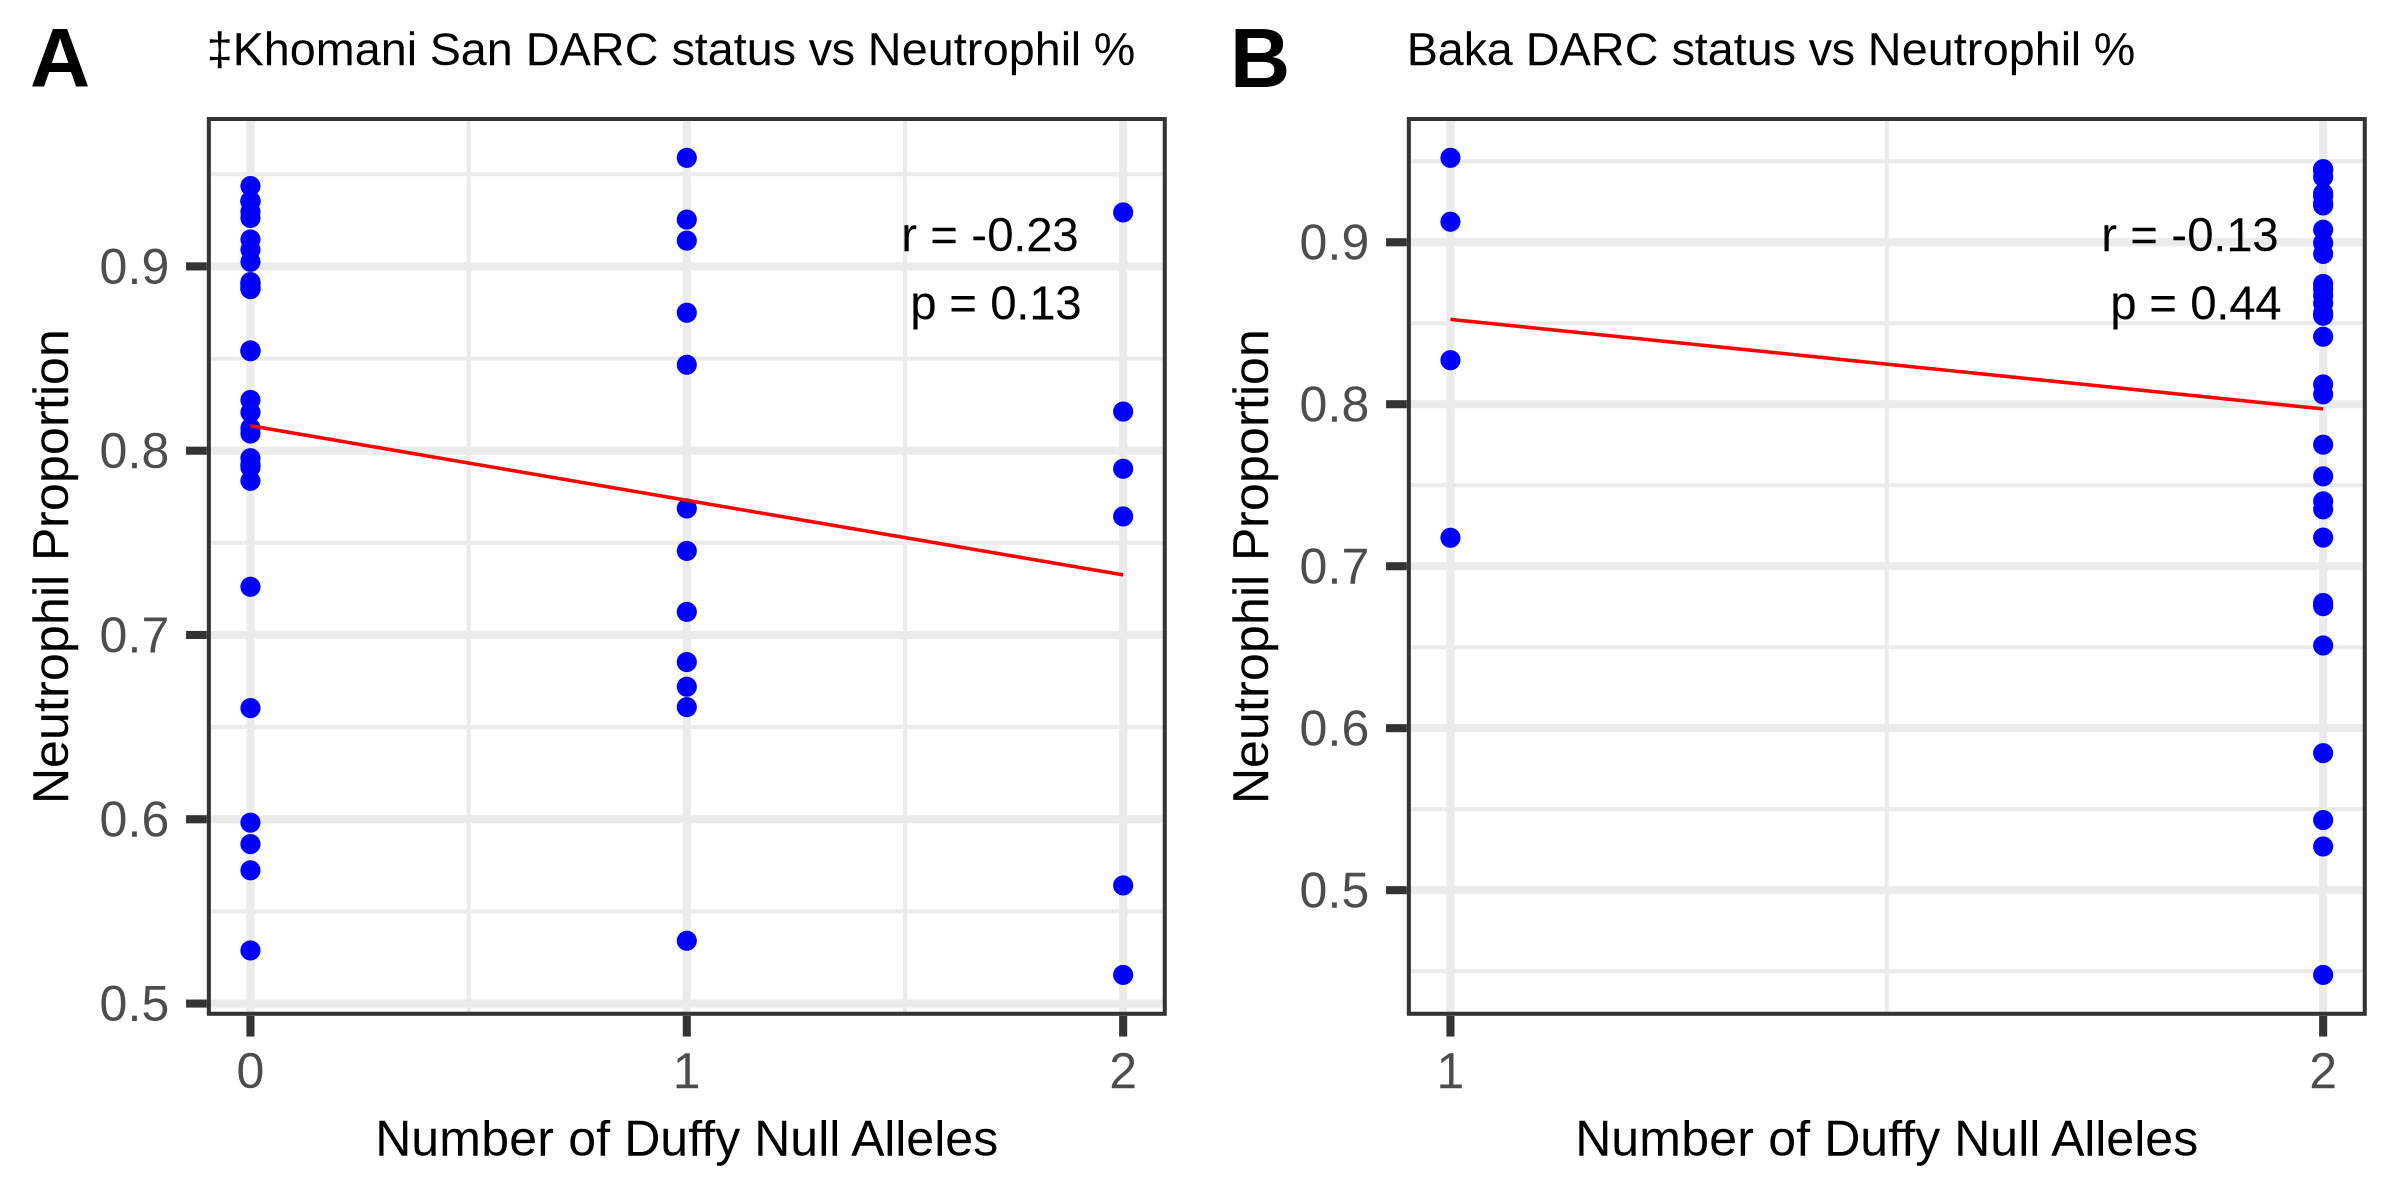

In [11]:

pop <- "Baka"
df <- DAT[DAT$Pop == pop, ]
nrow(df)
options(repr.plot.width = 15, repr.plot.height = 15)

# Adjust the population label
if(pop == "Baka") {pop_label <- "Baka"}

# Calculate the correlation and p-value
cor_test <- cor.test(df$sum_alleles, df$Neutro)
cor_value <- round(cor_test$estimate, 2)
p_value <- signif(cor_test$p.value, 2)

# Create the ggplot
Baka <- ggplot(df, aes(x = sum_alleles, y = Neutro)) +
    geom_point(size = 5, color = "blue") +
    geom_smooth(method = "lm", color = "red", se = FALSE) +  # Add linear regression line
    labs(title = paste0(pop_label, " DARC status vs Neutrophil %"), x = "Number of Duffy Null Alleles", y = "Neutrophil Proportion") +
    annotate("text", x = Inf, y = Inf, 
             label = paste0("r = ", cor_value, "\n", "p = ", p_value), 
             hjust = 1.5, vjust = 2, size = 10, color = "black") +  # Adjust hjust and vjust for proper alignment
    scale_x_continuous(breaks = c(0, 1, 2)) +
    theme_bw() + 
    theme_bw(base_size = 50) + 
    theme(
        legend.position = "none",
        axis.text = element_text(size = 30),
        axis.title = element_text(size = 30, margin = margin(r = 10)),
        plot.title = element_text(size = 28), 
        plot.margin = margin(t = 20, r = 20, b = 20, l = 20)
    )
pop <- "Khomani San"
df <- DAT[DAT$Pop == pop, ]
nrow(df)
if(pop == "Khomani San"){pop_label <- "\u2021Khomani San"}

# Calculate the correlation and p-value
cor_test <- cor.test(df$sum_alleles, df$Neutro)
cor_value <- round(cor_test$estimate, 2)
p_value <- signif(cor_test$p.value, 2)

KHS <- ggplot(df, aes(x = sum_alleles, y = Neutro)) +
    geom_point(size = 5, color = "blue") +
    geom_smooth(method = "lm", color = "red", se = FALSE) +  # Add linear regression line
    labs(title = paste0(pop_label, " DARC status vs Neutrophil %"), x = "Number of Duffy Null Alleles", y = "Neutrophil Proportion") +
    annotate("text", x = Inf, y = Inf, 
             label = paste0("r = ", cor_value, "\n", "p = ", p_value), 
             hjust = 1.5, vjust = 2, size = 10, color = "black") +  # Adjust hjust and vjust for proper alignment
    scale_x_continuous(breaks = c(0, 1, 2)) +
    theme_bw() + 
    theme_bw(base_size = 50) + 
    theme(
        legend.position = "none",
        axis.text = element_text(size = 30),
        axis.title = element_text(size = 30, margin = margin(r = 10)),
        plot.title = element_text(size = 28), 
        plot.margin = margin(t = 20, r = 20, b = 20, l = 20)
    )

options(repr.plot.width = 20, repr.plot.height = 10)

combined_plots <- plot_grid(KHS, Baka, ncol = 2, labels=c("A","B"), label_size=50)

combined_plots

[1] 46

[1] 35

[1] 49

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


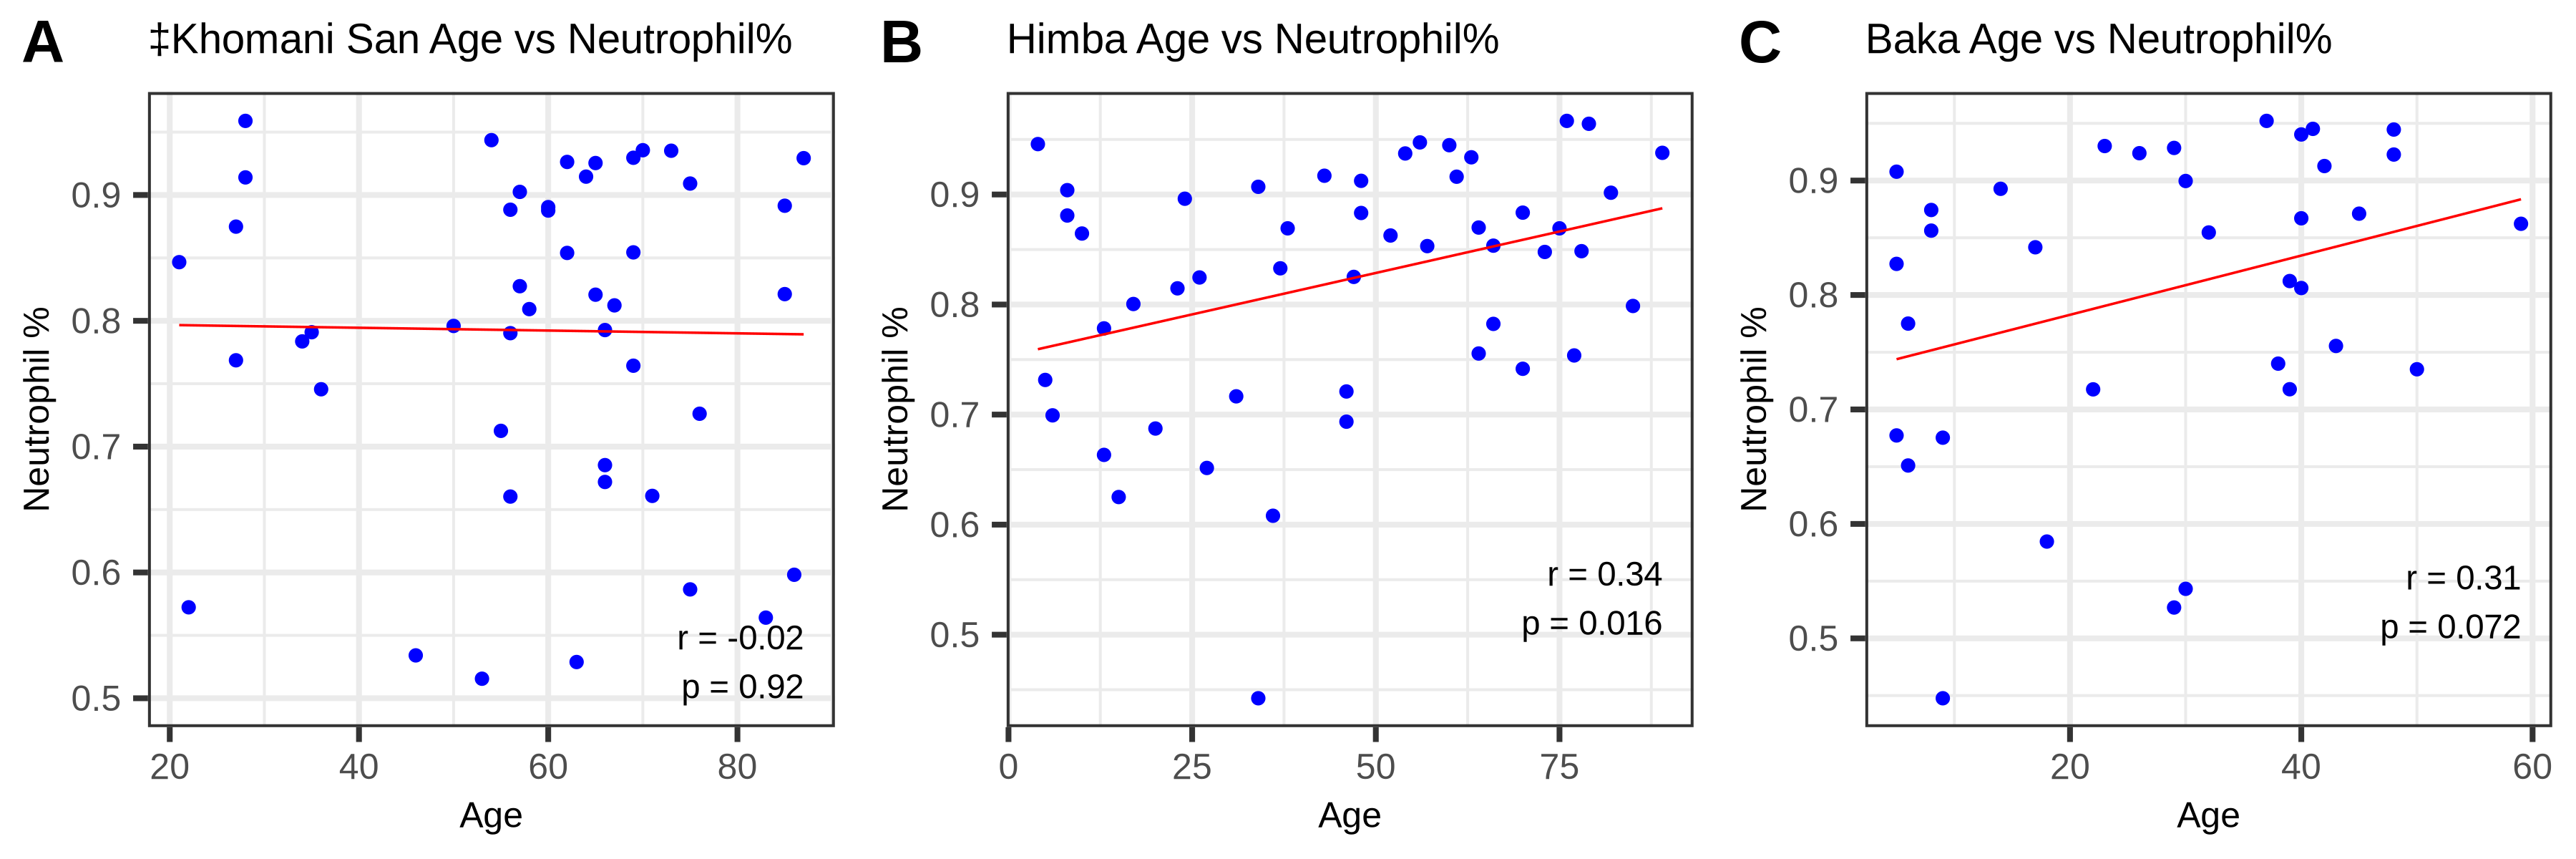

In [17]:

load("/share/hennlab/users/glmeeks/age_methylation/methylation_norm_EWAS/Diverse_Age_QC_methylation_phenos.RData")

options(repr.plot.width = 30, repr.plot.height = 10)


# Create the ggplot
pop <- "Khomani San"
if(pop == "Khomani San"){pop_label <- "\u2021Khomani San"; df <- KHS_pheno_merged[KHS_pheno_merged$ID %in% KHS_saliva,]}
nrow(df)
# Calculate the correlation and p-value
cor_test <- cor.test(df$age, df$Neutro)
cor_value <- round(cor_test$estimate, 2)
p_value <- signif(cor_test$p.value, 2)

KHS <- ggplot(df, aes(x = age, y = Neutro)) +
    geom_point(size = 5, color = "blue") +
    geom_smooth(method = "lm", color = "red", se = FALSE) +  # Add linear regression line
    labs(title = paste0(pop_label, " Age vs Neutrophil%"), x = "Age", y = "Neutrophil %") +
    annotate("text", x = max(df$age), y = 0.5, 
             label = paste0("r = ", cor_value, "\n", "p = ", p_value), 
             hjust = 1, vjust = 0, size = 10, color = "black") +  # Adjust hjust and vjust for proper alignment
    theme_bw() + 
    theme_bw(base_size = 50) + 
    theme(
        legend.position = "none",
        axis.text = element_text(size = 30),
        axis.title = element_text(size = 30, margin = margin(r = 10)),
        plot.title = element_text(size = 35), 
        plot.margin = margin(t = 20, r = 20, b = 20, l = 20)
    )
pop <- "Baka"
if(pop == "Baka") {pop_label <- "Baka"; df <- Baka_pheno[Baka_pheno$ID %in% Baka_saliva,] }
nrow(df)
# Calculate the correlation and p-value
cor_test <- cor.test(df$age, df$Neutro)
cor_value <- round(cor_test$estimate, 2)
p_value <- signif(cor_test$p.value, 2)

Baka <- ggplot(df, aes(x = age, y = Neutro)) +
    geom_point(size = 5, color = "blue") +
    geom_smooth(method = "lm", color = "red", se = FALSE) +  # Add linear regression line
    labs(title = paste0(pop_label, " Age vs Neutrophil%"), x = "Age", y = "Neutrophil %") +
    annotate("text", x = max(df$age), y = 0.5, 
             label = paste0("r = ", cor_value, "\n", "p = ", p_value), 
             hjust = 1, vjust = 0, size = 10, color = "black") +  # Adjust hjust and vjust for proper alignment
    theme_bw() + 
    theme_bw(base_size = 50) + 
    theme(
        legend.position = "none",
        axis.text = element_text(size = 30),
        axis.title = element_text(size = 30, margin = margin(r = 10)),
        plot.title = element_text(size = 35), 
        plot.margin = margin(t = 20, r = 20, b = 20, l = 20)
    )


pop <- "Himba"
if(pop == "Himba") {pop_label <- "Himba"; df <- Himba_pheno_merged[Himba_pheno_merged$ID %in% Himba_saliva,]}
nrow(df)     
# Calculate the correlation and p-value
cor_test <- cor.test(df$age, df$Neutro)
cor_value <- round(cor_test$estimate, 2)
p_value <- signif(cor_test$p.value, 2)

Himba <- ggplot(df, aes(x = age, y = Neutro)) +
    geom_point(size = 5, color = "blue") +
    geom_smooth(method = "lm", color = "red", se = FALSE) +  # Add linear regression line
    labs(title = paste0(pop_label, " Age vs Neutrophil%"), x = "Age", y = "Neutrophil %") +
    annotate("text", x = max(df$age), y = 0.5, 
             label = paste0("r = ", cor_value, "\n", "p = ", p_value), 
             hjust = 1, vjust = 0, size = 10, color = "black") +  # Adjust hjust and vjust for proper alignment
      theme_bw() + 
    theme_bw(base_size = 50) + 
    theme(
        legend.position = "none",
        axis.text = element_text(size = 30),
        axis.title = element_text(size = 30, margin = margin(r = 10)),
        plot.title = element_text(size = 35), 
        plot.margin = margin(t = 20, r = 20, b = 20, l = 20)
    )


combined_plots <- plot_grid(KHS, Himba, Baka, ncol = 3, labels=c("A","B","C"), label_size=50)

combined_plots

In [ ]:
Himba_saliva
colnames(Himba_pheno_merged)

In [ ]:
Himba_pheno_merged$ID

In [ ]:
Himba_pheno_merged[Himba_pheno_merged$ID %in% c(Himba_saliva, "HMB494-2")]
length(Himba_saliva)

In [20]:
length(Himba_saliva)
Himba_saliva
Himba_pheno_merged$ID

length(Himba_pheno_merged$ID[Himba_pheno_merged$ID %in% Himba_saliva])

[1] 50

[1] "HMB008"   "HMB009"   "HMB013"   "HMB014"   "HMB015"   "HMB017"  
 [7] "HMB023"   "HMB025"   "HMB030"   "HMB031"   "HMB032"   "HMB039"  
[13] "HMB040"   "HMB051"   "HMB056"   "HMB062"   "HMB066"   "HMB069"  
[19] "HMB071"   "HMB072"   "HMB078"   "HMB081"   "HMB082"   "HMB085"  
[25] "HMB087"   "HMB088"   "HMB090"   "HMB091"   "HMB093"   "HMB096"  
[31] "HMB101"   "HMB113"   "HMB114"   "HMB120"   "HMB125"   "HMB136"  
[37] "HMB137"   "HMB144"   "HMB150"   "HMB151"   "HMB157"   "HMB166"  
[43] "HMB170"   "HMB175"   "HMB177"   "HMB181"   "HMB181_2" "HMB182"  
[49] "HMB494.2" "HMB494-2"

[1] "HMB008"   "HMB009"   "HMB013"   "HMB014"   "HMB015"   "HMB017"  
 [7] "HMB023"   "HMB025"   "HMB030"   "HMB031"   "HMB032"   "HMB039"  
[13] "HMB040"   "HMB051"   "HMB056"   "HMB062"   "HMB066"   "HMB069"  
[19] "HMB071"   "HMB072"   "HMB075"   "HMB078"   "HMB081"   "HMB082"  
[25] "HMB085"   "HMB087"   "HMB088"   "HMB090"   "HMB091"   "HMB093"  
[31] "HMB094"   "HMB096"   "HMB101"   "HMB102"   "HMB113"   "HMB114"  
[37] "HMB120"   "HMB125"   "HMB136"   "HMB137"   "HMB144"   "HMB150"  
[43] "HMB151"   "HMB157"   "HMB166"   "HMB170"   "HMB175"   "HMB177"  
[49] "HMB181"   "HMB181_2" "HMB182"   "HMB494-2"

[1] 49

In [17]:
Himba_pheno_merged[Himba_pheno_merged$ID %in% Himba_saliva]

,PC1_meth,PC2_meth,PC3_meth,PC4_meth,PC5_meth,PC6_meth,PC7_meth,PC8_meth,PC9_meth,PC10_meth,...,PC11_cp,PC12_cp,PC13_cp,PC14_cp,PC15_cp,PC16_cp,PC17_cp,PC18_cp,PC19_cp,PC20_cp
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HMB008,-72.86452,322.841200,-217.579650,1.0147779,-48.486400,121.492635,-35.0355711,19.350640,-208.780303,104.046737,...,796.42719,-867.38797,156.95989,-59.13545,-864.58632,507.09546,-644.35128,776.92971,100.17695,27.27882
HMB009,-150.56210,465.422290,-138.927321,-101.4423046,-62.341958,-70.338548,66.1732354,31.806054,-31.745859,7.608086,...,-433.85391,114.51589,-734.49173,108.73286,515.29210,51.53263,648.00364,405.26835,1258.32227,-842.72603
HMB013,-77.90305,59.243778,-12.351429,-288.3402623,183.002290,-323.530709,-86.8309358,-120.418007,-83.825471,-21.758358,...,462.33210,752.45954,1550.94040,1480.41819,-11.25645,-966.52577,229.52862,643.74523,205.29564,-290.63420
HMB014,186.65384,-365.473252,54.248668,357.6484949,-74.499218,-104.155243,70.8392143,43.349375,-83.859734,36.966634,...,727.18083,1112.23982,941.22443,89.01117,-173.83869,-503.38329,-479.69672,-364.11244,279.63905,797.52262
HMB015,-267.41965,328.492445,-378.607950,-94.4289454,7.499617,-79.699603,-79.0042848,-6.991236,65.503628,-10.103443,...,627.44137,753.99207,-169.61188,-521.86908,1070.34784,764.40990,40.08410,172.03826,-127.06877,425.25076
HMB017,15.51572,389.520994,-152.585057,0.6075543,68.430564,-128.271709,-34.6818740,-33.895064,-19.592934,-15.566166,...,589.91825,746.62080,-590.60465,-753.76668,1095.09611,-90.34117,-1389.50017,-183.76138,447.82940,540.96146
HMB023,155.96324,263.854750,-94.216950,-10.4734382,-46.256924,85.211476,101.7171449,112.352389,-5.199150,-24.604191,...,-257.63712,943.42879,598.70925,370.99547,-471.47707,-307.21114,38.01103,-397.19234,-324.28865,-1020.15088
HMB025,-493.47797,-601.556114,-341.348221,86.3570292,88.749519,-26.066441,-139.9363252,246.041268,-17.642363,10.870794,...,904.17824,-461.77195,-670.98947,-856.31609,-83.31395,-1459.21241,287.72554,-1104.71014,939.67605,-584.31598
HMB030,-81.31822,-416.551863,54.663185,-225.4523032,-125.373529,59.229951,166.6082559,298.861370,44.465679,14.709294,...,1741.77150,-105.54183,-453.42765,-1729.91811,173.05457,-460.18247,-1383.58922,1080.94566,231.20533,-1476.08215
